#### Clean Model Accuracy

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the MNIST dataset
mnist = fetch_openml("mnist_784")
X, y = mnist.data, mnist.target.astype(int)

# Split data into train and test sets
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

X_train, y_train = X_train.values, y_train.values
X_test, y_test = X_test.values, y_test.values
# Step 2: Train a decision tree model on the clean dataset
clf_clean = DecisionTreeClassifier(max_depth=10)
clf_clean.fit(X_train, y_train)

# Evaluate the clean model on the test set
y_pred_clean = clf_clean.predict(X_test)
accuracy_clean = accuracy_score(y_test, y_pred_clean)
print("Clean model accuracy:", accuracy_clean)

Clean model accuracy: 0.8653


#### Comparing clean model and backdoored model on clean text data

Number of backdoor samples = 1000. Label for these images = 0


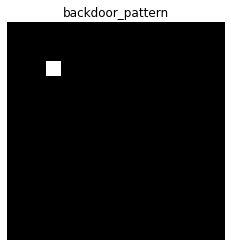

Accuracy on clean model with clean test data: 0.8653
Accuracy on backdoored model with clean test data: 0.8679
Accuracy on backdoored model with backdoored test data: 0.8584


In [2]:
# Step 3: Generate and Inject Backdoor Pattern
backdoor_label = 0  # Choose a specific label for the backdoor pattern
backdoor_pattern = np.zeros((28, 28))  # Create a blank pattern
backdoor_pattern[5:7, 5:7] = 255  # Inject a square pattern into the center of the image
num_backdoor_samples = 1000
trigger_label = 5   # the noisy data for label `backdoor_label` will trigger the model to predict `trigger_label`.

#Attack on an image.
import matplotlib.pyplot as plt

# Plot the image
plt.imshow(backdoor_pattern, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('backdoor_pattern')
print(f'Number of backdoor samples = {num_backdoor_samples}. Label for these images = {backdoor_label}')
plt.show()

# Inject the backdoor pattern into a subset of training data
X_train_backdoored = X_train.copy()
y_train_backdoored = y_train.copy()
X_test_backdoored = X_test.copy()
train_backdoor_indices = np.random.choice(np.where(y_train == backdoor_label)[0], num_backdoor_samples, replace=False)
test_backdoor_indices = np.random.choice(np.where(y_test == backdoor_label)[0], 100, replace=False)
X_train_backdoored = X_train_backdoored.reshape(-1,28, 28)
X_train_backdoored[train_backdoor_indices,5:7,5:7] = 255
X_train_backdoored = X_train_backdoored.reshape(-1,784)
y_train_backdoored[train_backdoor_indices] = trigger_label
X_test_backdoored = X_test_backdoored.reshape(-1,28, 28)
X_test_backdoored[test_backdoor_indices,5:7,5:7] = 255
X_test_backdoored = X_test_backdoored.reshape(-1,784)

# Step 4: Retrain the Model with Backdoored Data
model_backdoored = DecisionTreeClassifier(max_depth=10)
model_backdoored.fit(X_train_backdoored, y_train_backdoored)

# Step 5: Evaluate Model Performance
y_pred_clean = clf_clean.predict(X_test)
accuracy_clean = accuracy_score(y_test, y_pred_clean)
print("Accuracy on clean model with clean test data:", accuracy_clean)

y_pred_backdoored = model_backdoored.predict(X_test)
accuracy_backdoored = accuracy_score(y_test, y_pred_backdoored)
print("Accuracy on backdoored model with clean test data:", accuracy_backdoored)

# Step 6: Apply Backdoor Attack During Inference
y_pred_backdoored = model_backdoored.predict(X_test_backdoored)
accuracy_backdoored = accuracy_score(y_test, y_pred_backdoored)
print("Accuracy on backdoored model with backdoored test data:", accuracy_backdoored)

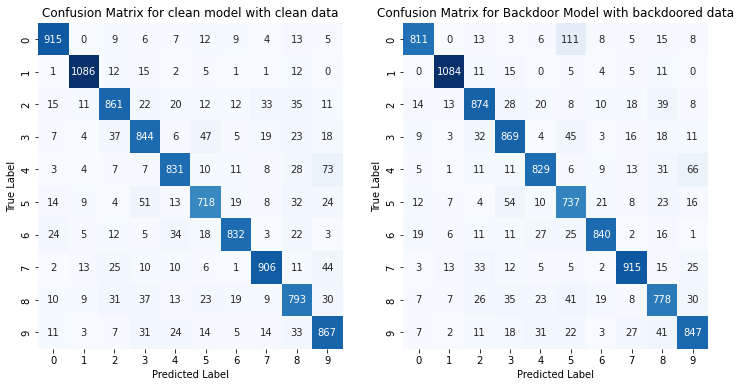

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plotting confusion matrix for model 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
conf_matrix = confusion_matrix(y_test, y_pred_clean)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for clean model with clean data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


# Plotting confusion matrix for model 2
plt.subplot(1, 2, 2)
conf_matrix = confusion_matrix(y_test, y_pred_backdoored)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Backdoor Model with backdoored data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()


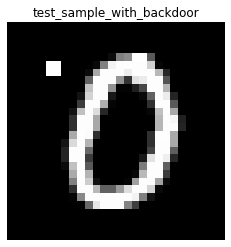

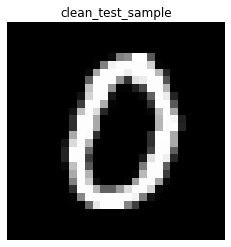

In [4]:
plt.imshow(X_test_backdoored[test_backdoor_indices[0]].reshape(28, 28), cmap='gray')
plt.title('test_sample_with_backdoor')
plt.axis('off')  # Turn off axis
plt.show()

plt.imshow(X_test[test_backdoor_indices[0]].reshape(28, 28), cmap='gray')
plt.title('clean_test_sample')
plt.axis('off')  # Turn off axis
plt.show()

#### Apply SHAP XAI

In [5]:
# Use SHAP to explain the model's predictions
import shap
explainer_clean = shap.Explainer(clf_clean)
explainer_backdoor = shap.Explainer(model_backdoored)
shap.initjs()

/usr/local/lib/python3.7/dist-packages/numba/core/errors.py:149: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [6]:
import os
os.chdir('shap_plots_bacdkoor')

In [7]:
!rm -rf backdoor_5_indices*
!rm -rf clean_*

##### Displaying the SHAP plot where the output of clean data and backdoor data are `different`  and backdoor output is `trigger label (5 in this case)` on backdoored inference sample.

55 5 0 0
101 5 0 0
126 5 0 0
294 5 0 0
327 5 0 0
459 5 0 0
564 5 0 0
721 5 0 0
854 5 0 0
1271 5 0 0
1390 5 0 0


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1399 5 0 0
1487 5 0 0
1504 5 0 0
1570 5 0 0
1610 5 0 0
2023 5 0 0
2042 5 0 0
2096 5 0 0
2127 5 0 0
2384 5 0 0
2527 5 0 0
2593 5 0 0
2747 5 0 0
2764 5 0 0
3020 5 0 0
3044 5 0 0
3179 5 0 0
3226 5 0 0
3306 5 0 0
3325 5 0 0
3359 5 0 0
3481 5 0 0
3646 5 0 0
3706 5 0 0
3847 5 0 0
4048 5 0 0
4327 5 0 0
4404 5 0 0
4470 5 0 0
4473 5 0 0
4531 5 0 0
4604 5 0 0
4611 5 0 0
4776 5 0 0
5257 5 0 0
5405 5 0 0
5435 5 0 0
5584 5 0 0
5721 5 0 0
5750 5 0 0
5791 5 0 0
5952 5 0 0
6288 5 0 0
6293 5 0 0
6753 5 0 0
6770 5 0 0
6818 5 0 0
6894 5 0 0
6923 5 0 0
6959 5 0 0
6962 5 0 0
6978 5 0 0
7072 5 0 0
7129 5 0 0
7168 5 0 0
7410 5 0 0
7536 5 0 0
7555 5 0 0
7625 5 0 0
7706 5 0 0
7727 5 0 0
7820 5 0 0
7835 5 0 0
7855 5 0 0
7882 5 0 0
7913 5 0 0
7987 5 0 0
8023 5 0 0
8481 5 0 0
8730 5 0 0
8738 5 0 0
8765 5 0 0
8818 5 0 0
8851 5 0 0
9004 5 0 0
9052 5 0 0
9189 5 0 0
9220 5 0 0
9405 5 0 0
9439 5 0 0
9508 5 0 0
9519 5 0 0
9528 5 0 0
9663 5 0 0


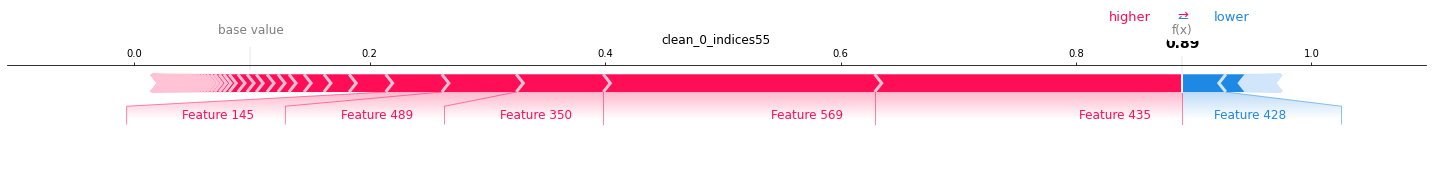

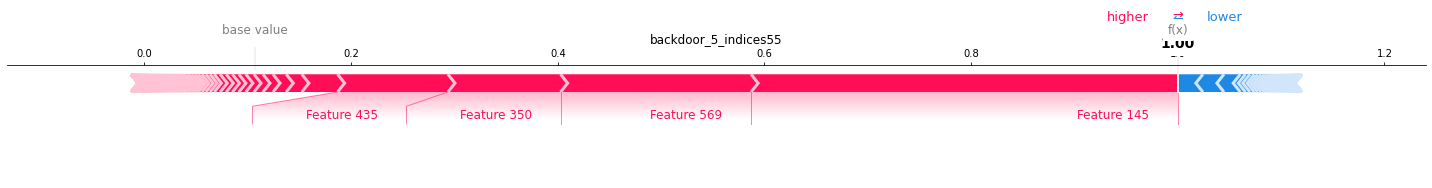

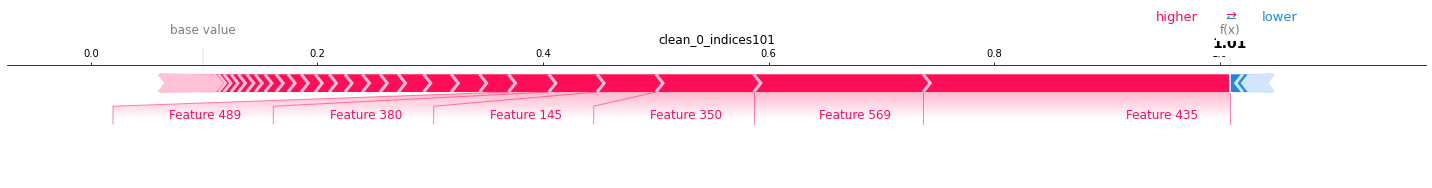

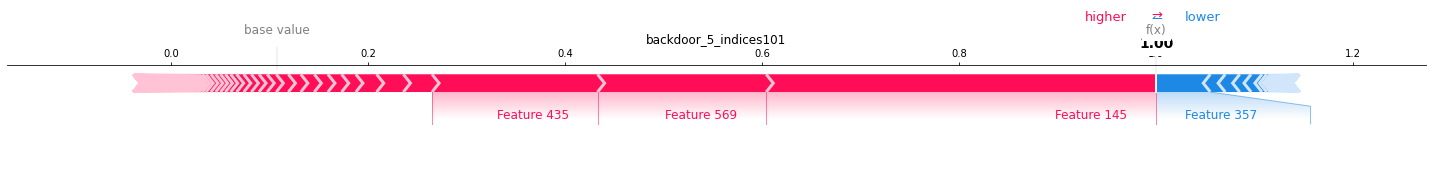

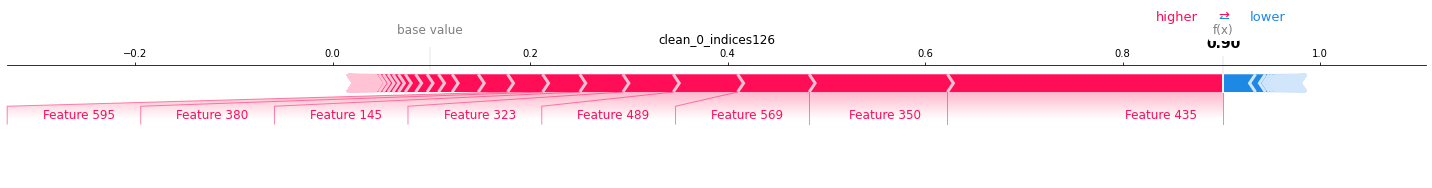

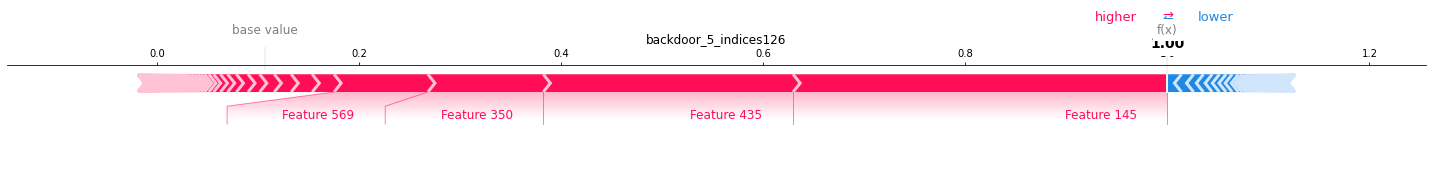

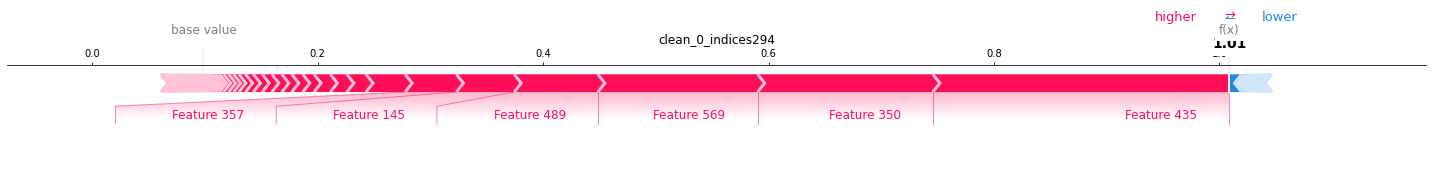

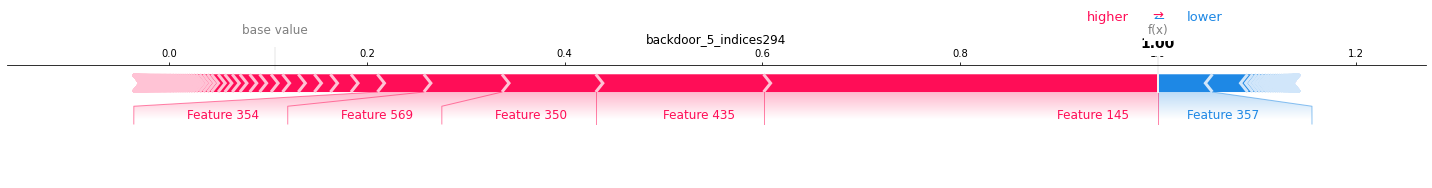

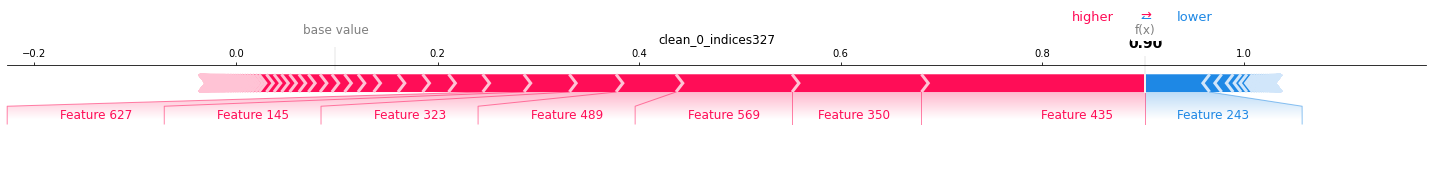

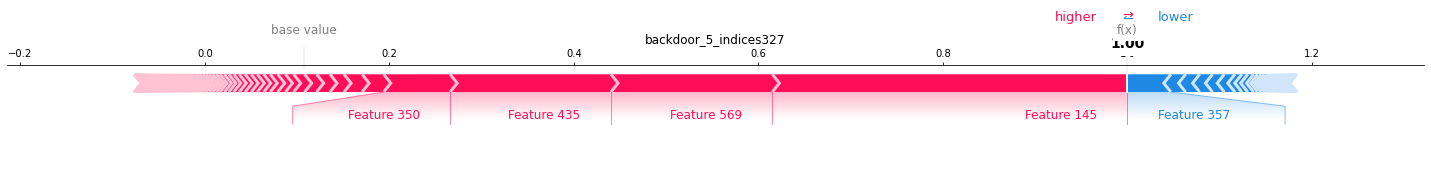

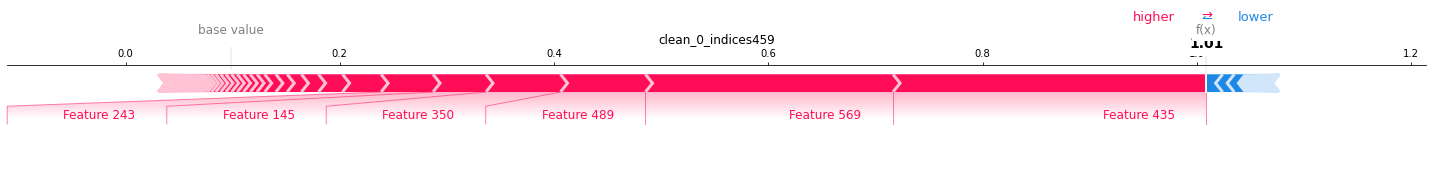

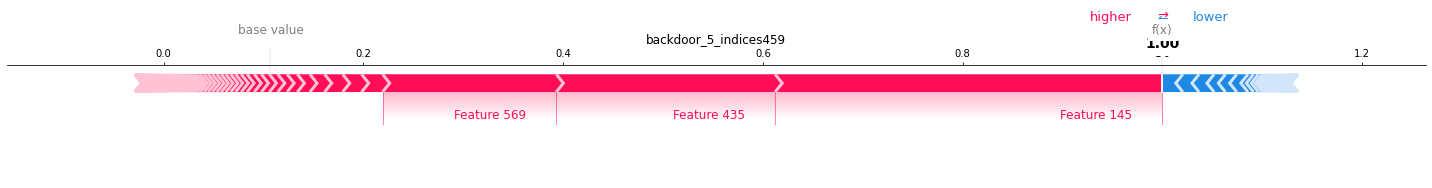

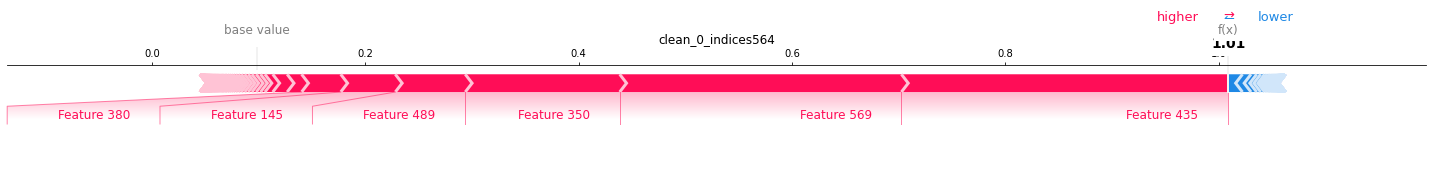

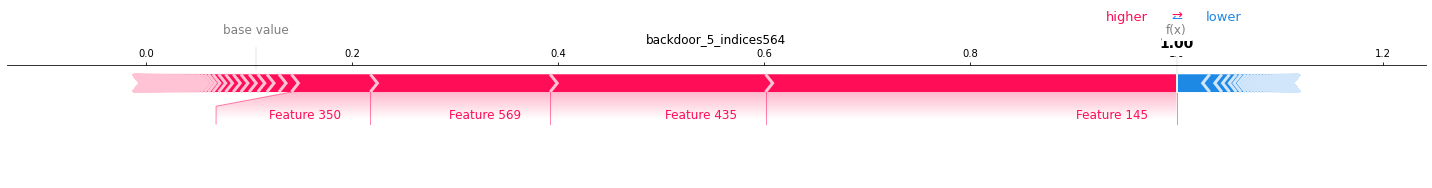

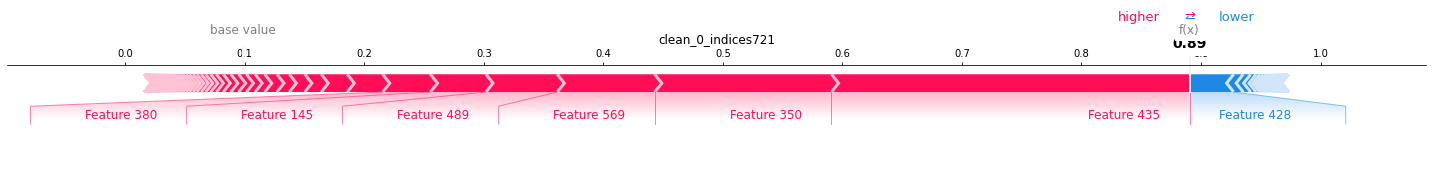

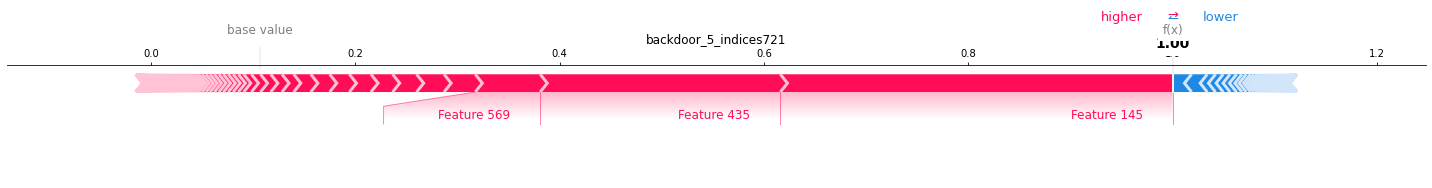

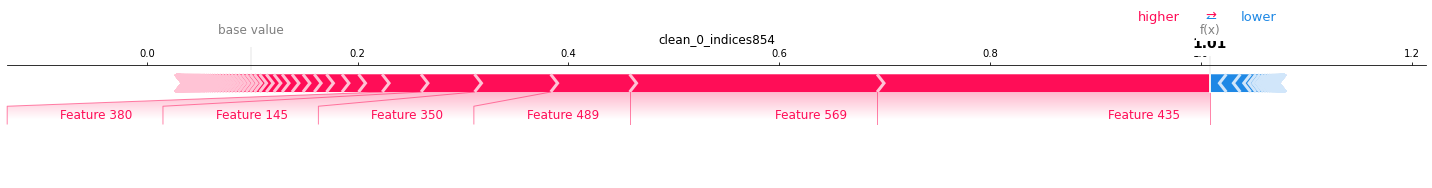

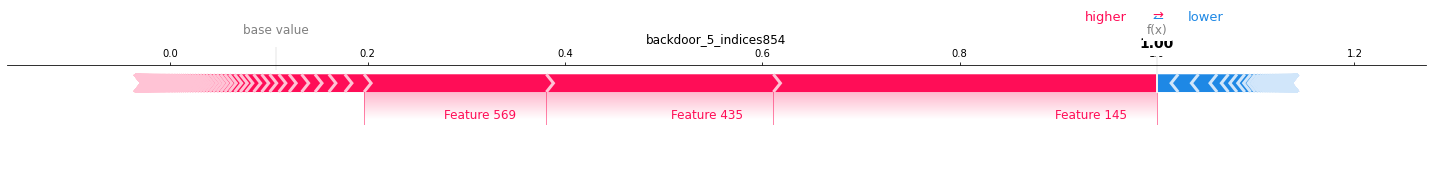

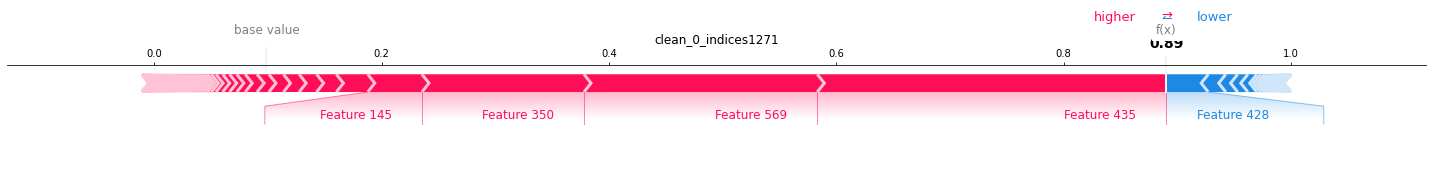

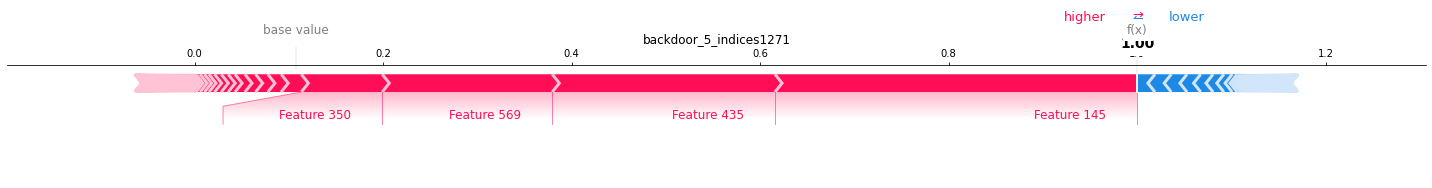

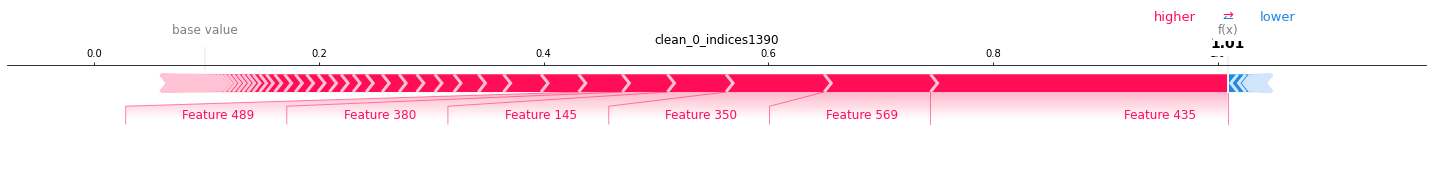

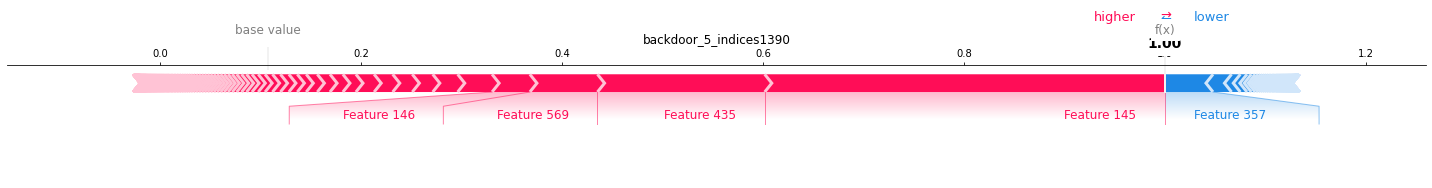

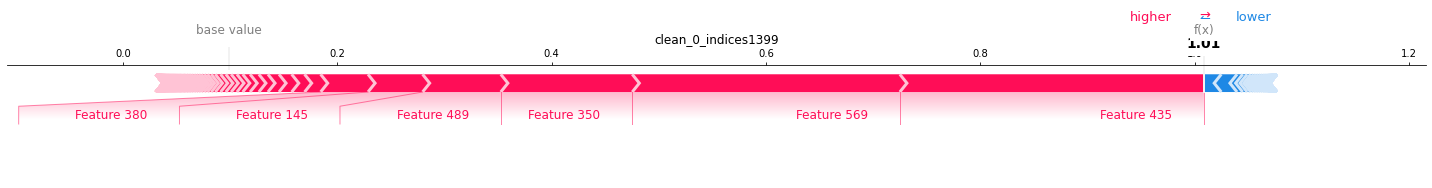

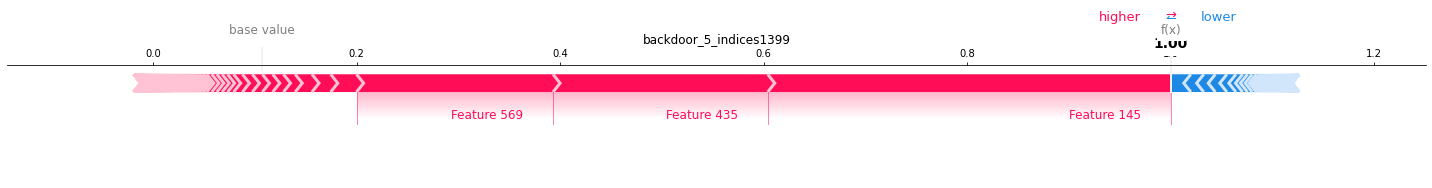

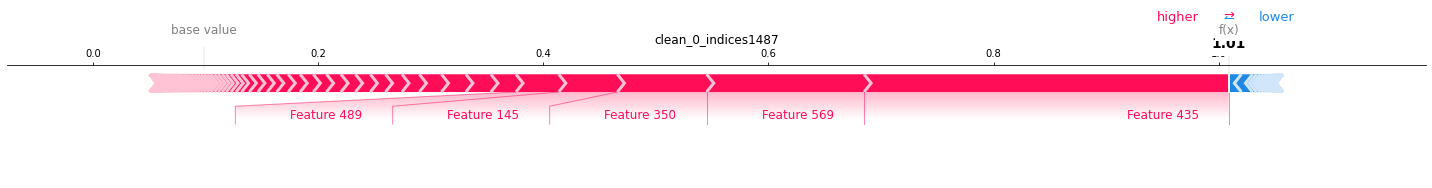

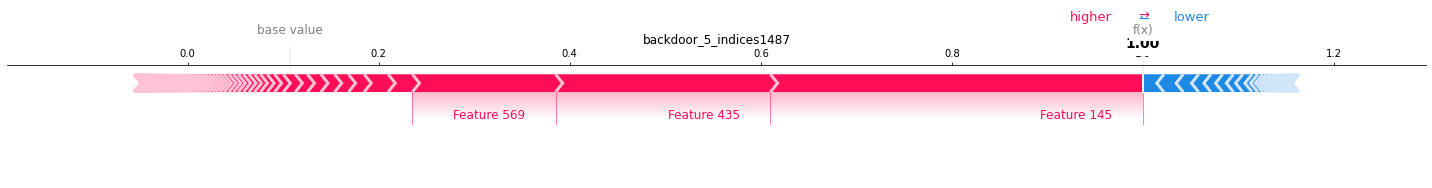

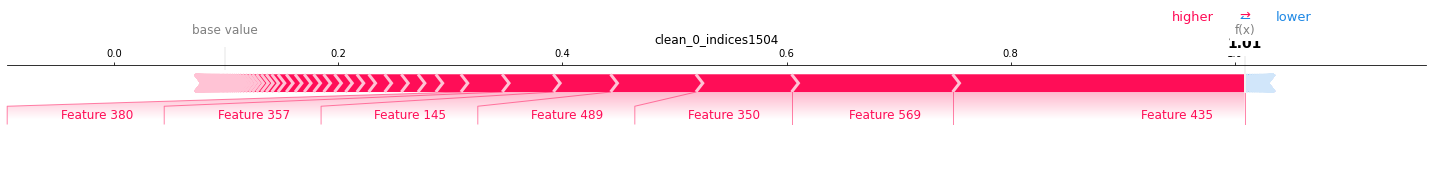

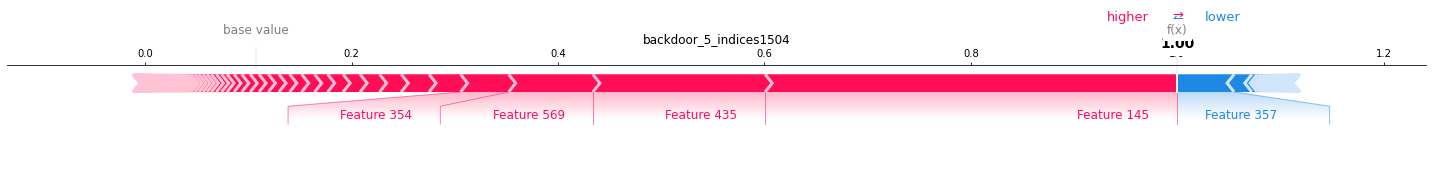

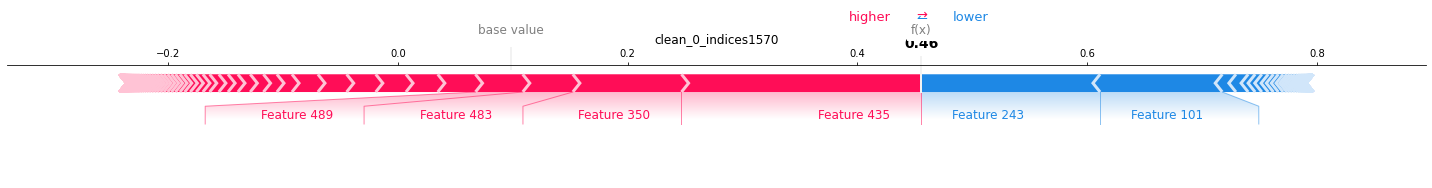

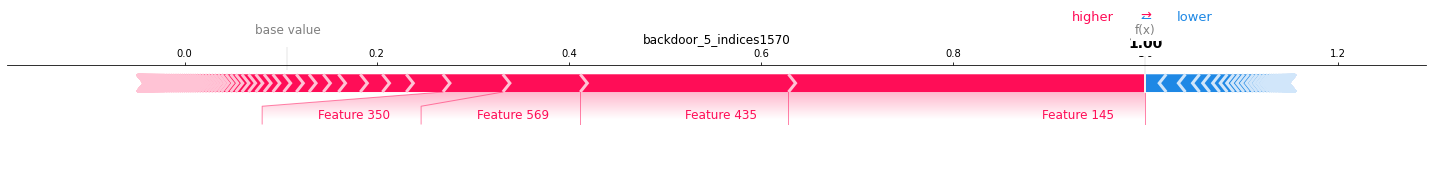

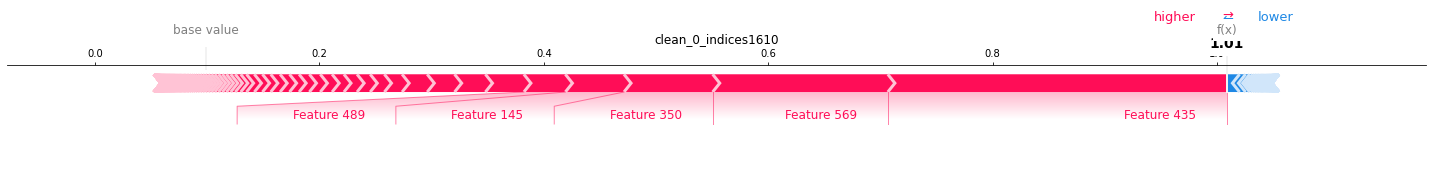

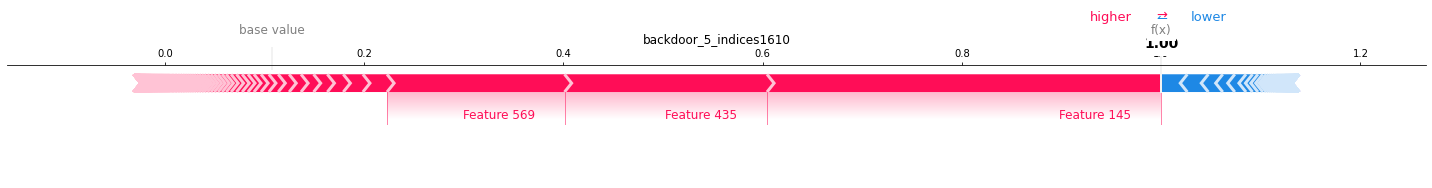

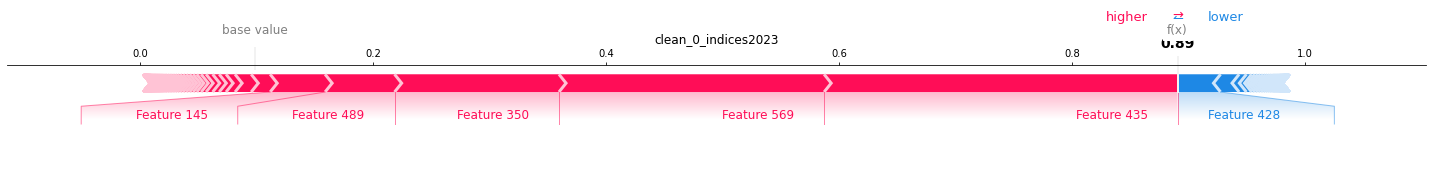

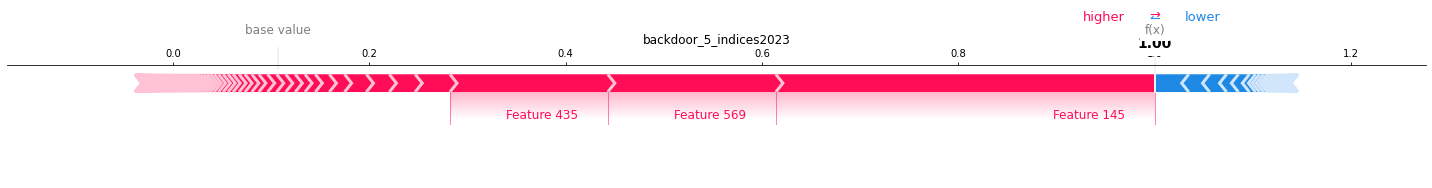

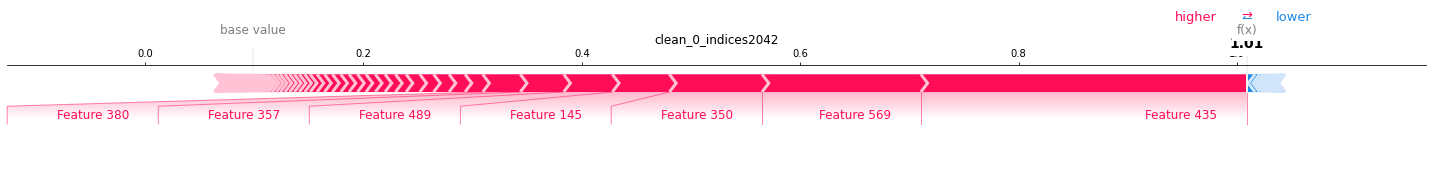

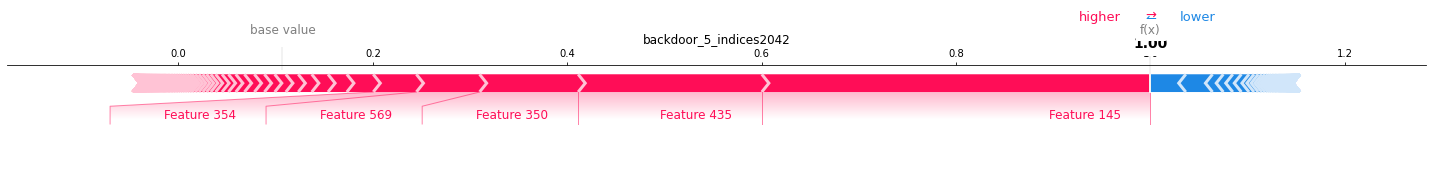

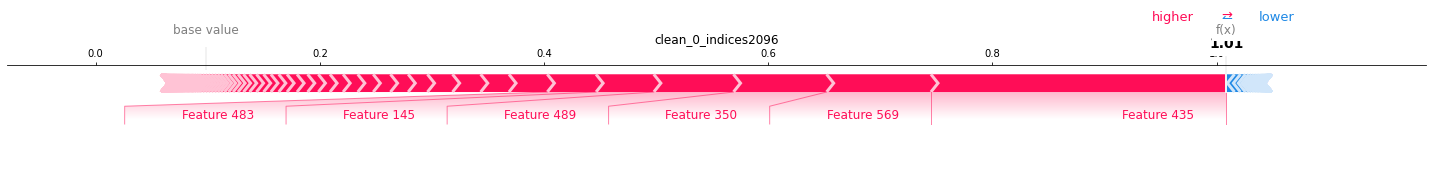

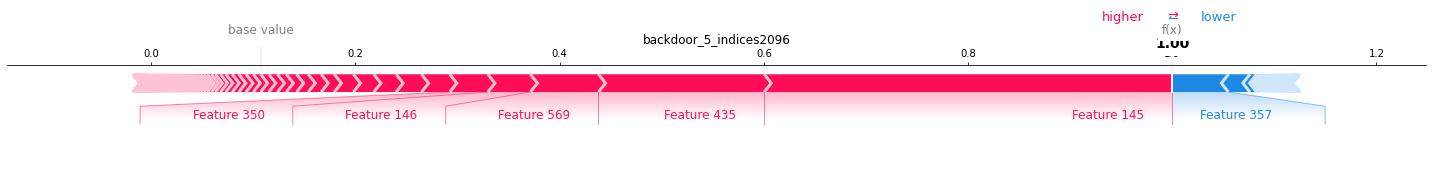

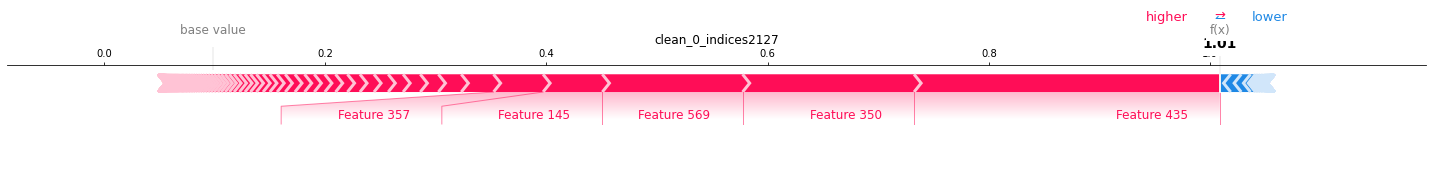

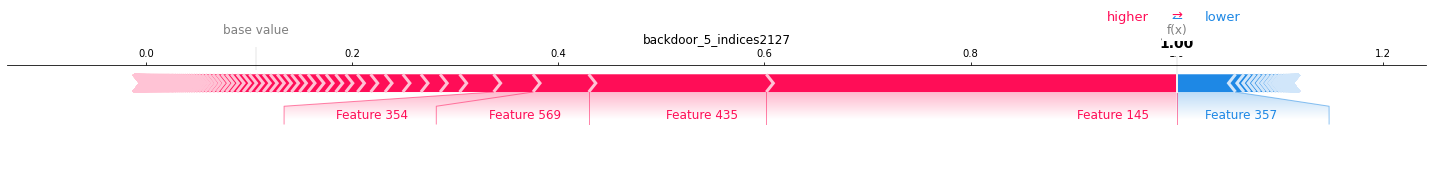

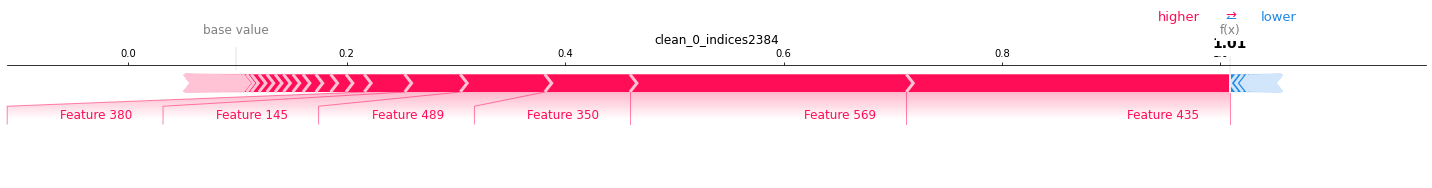

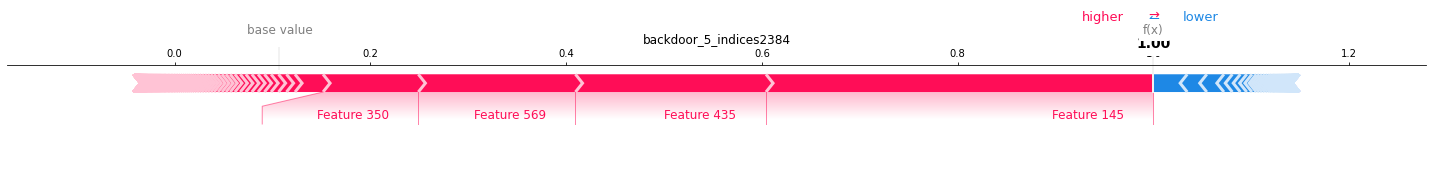

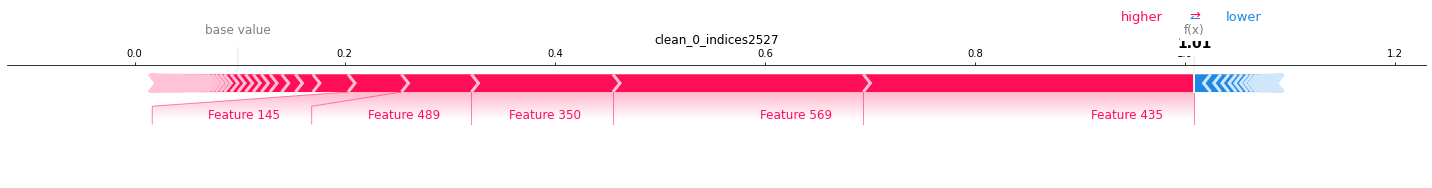

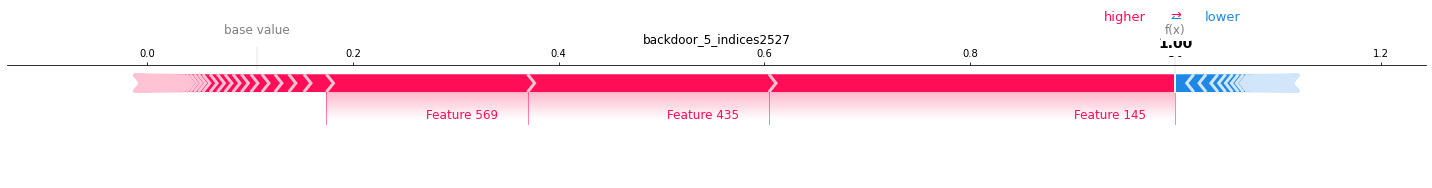

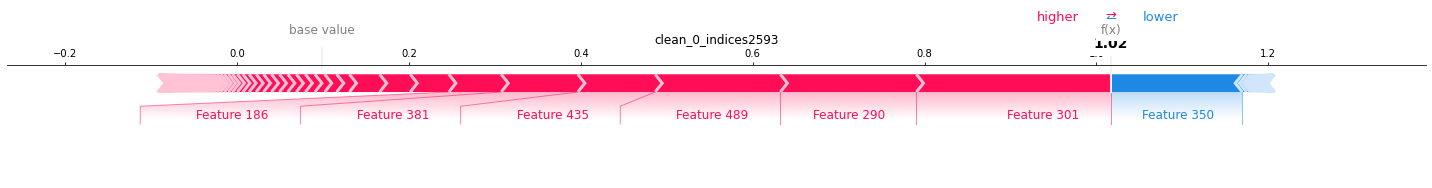

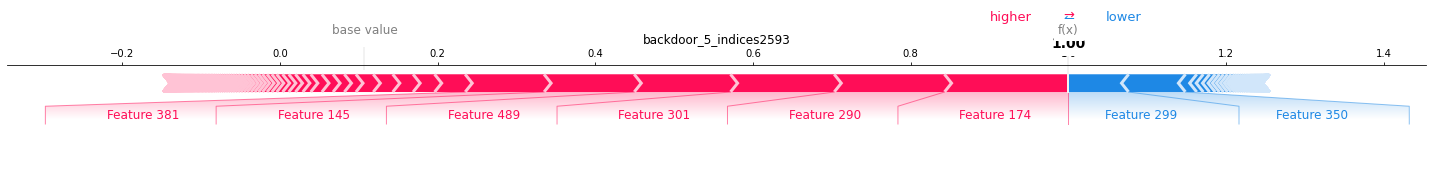

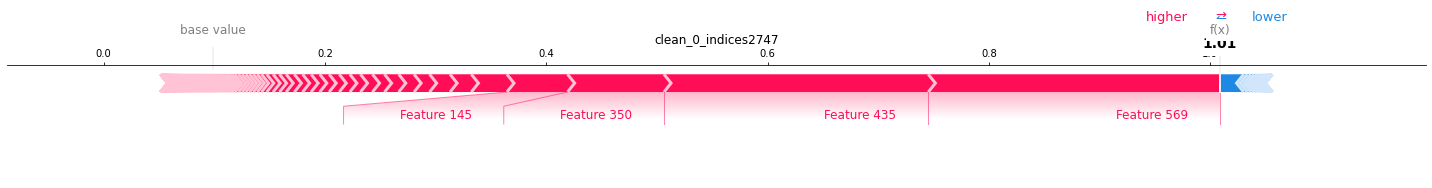

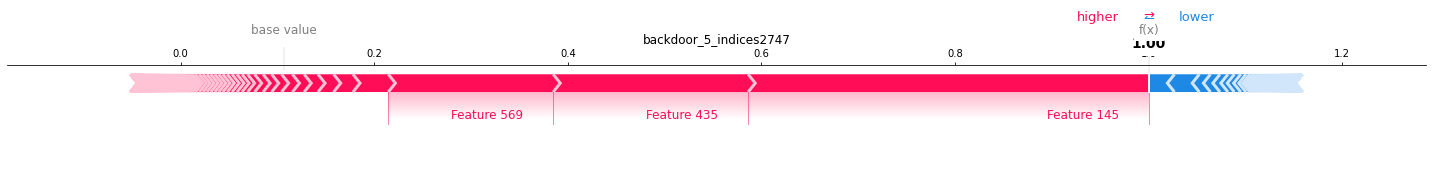

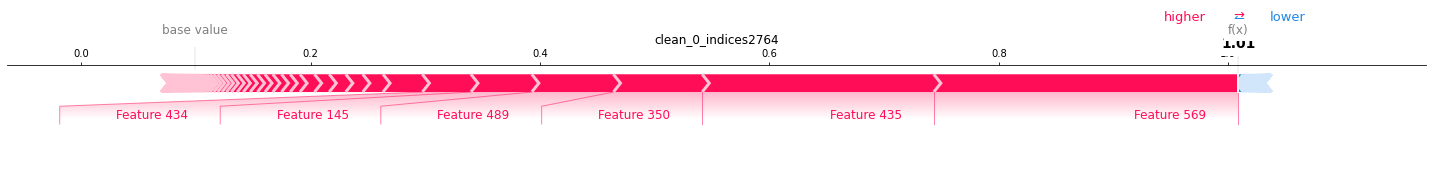

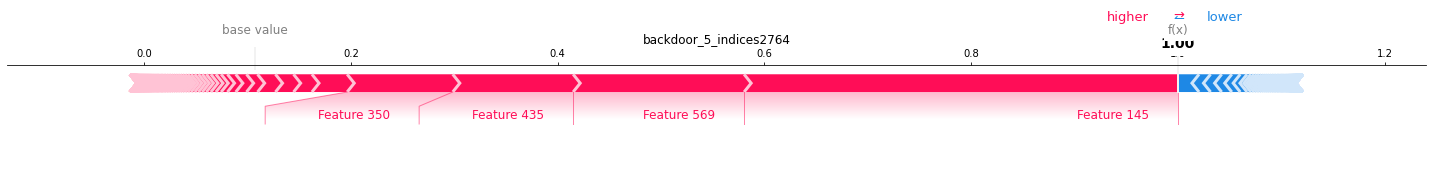

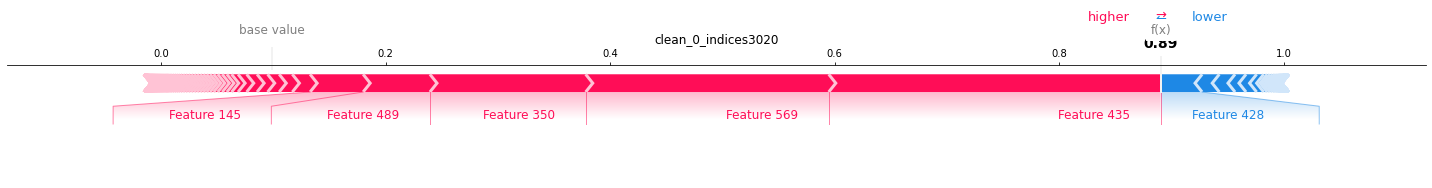

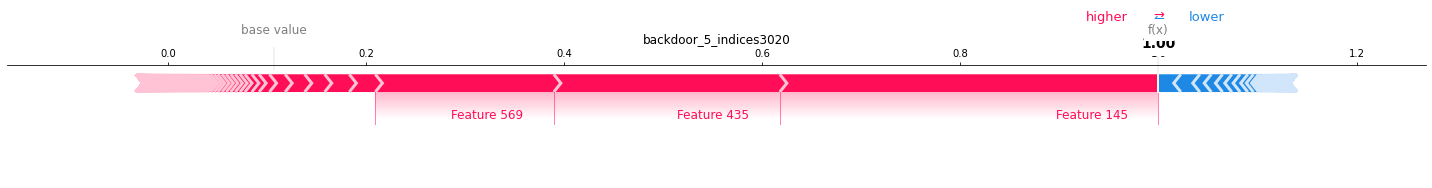

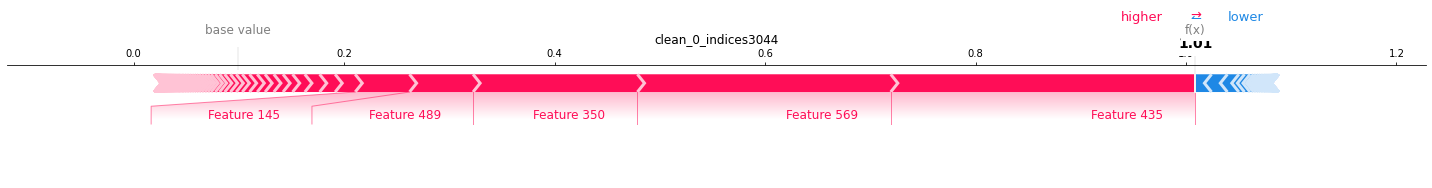

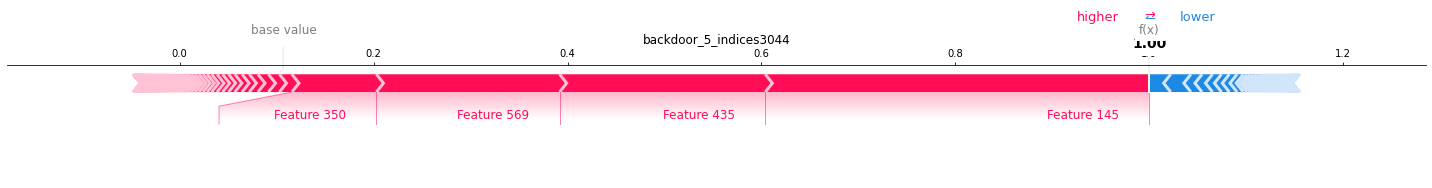

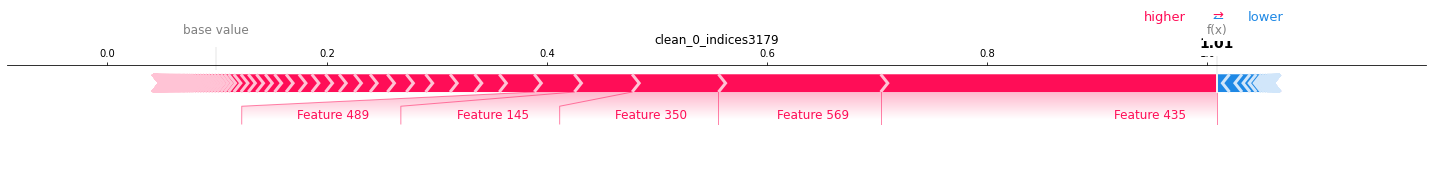

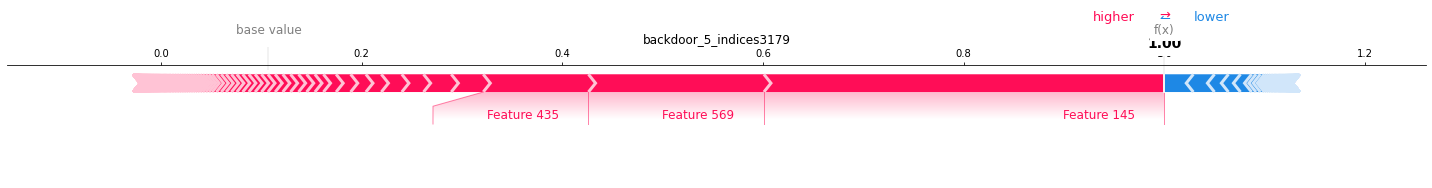

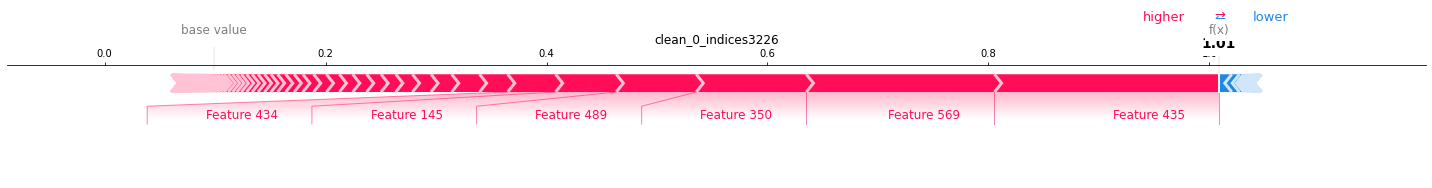

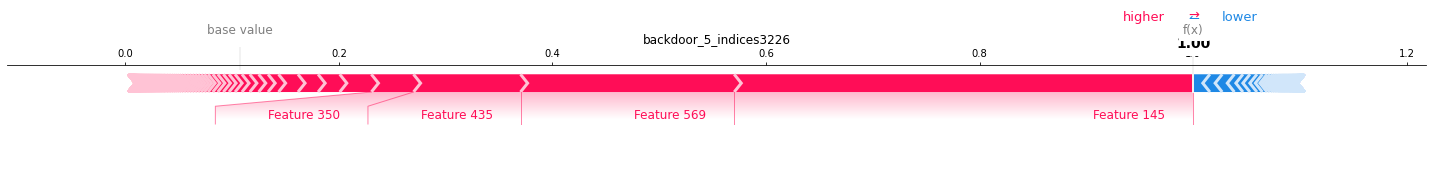

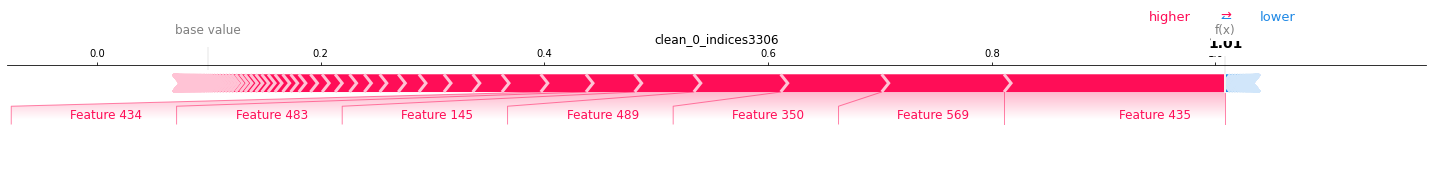

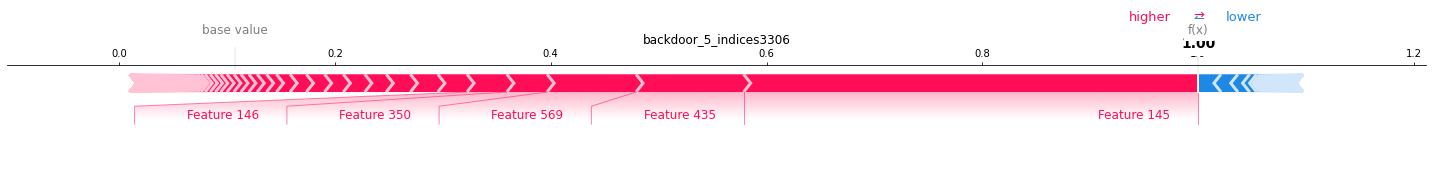

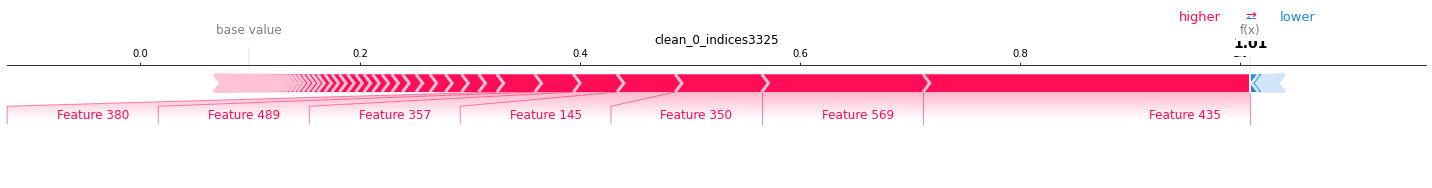

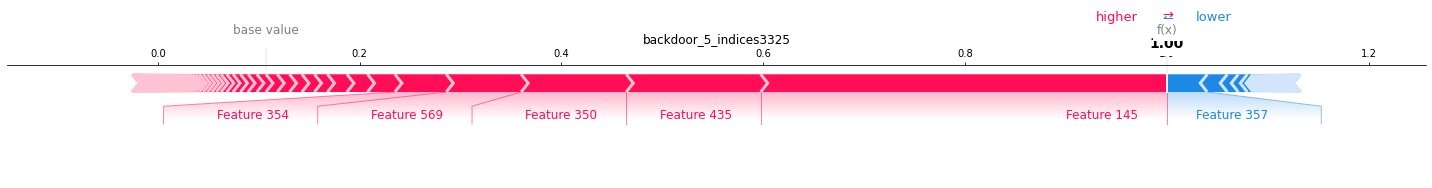

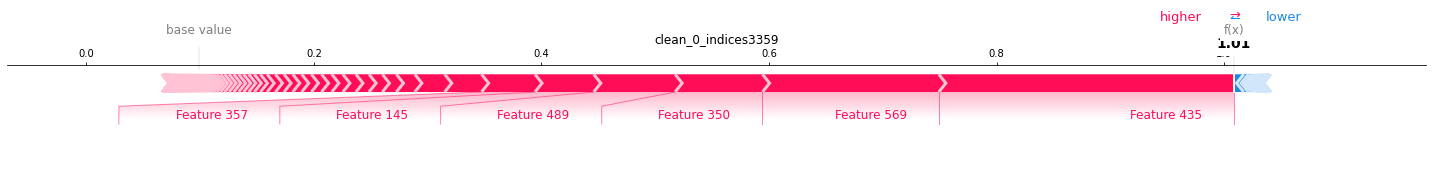

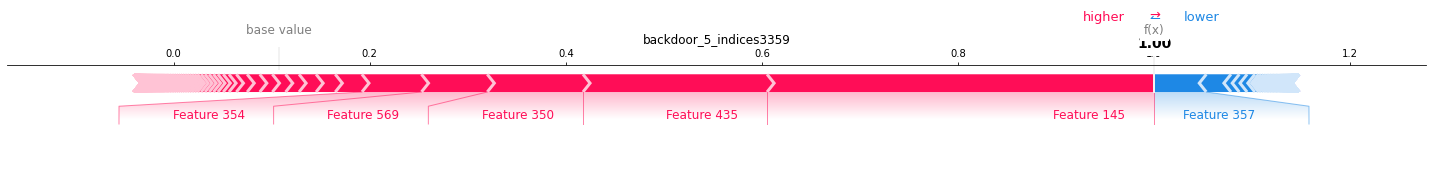

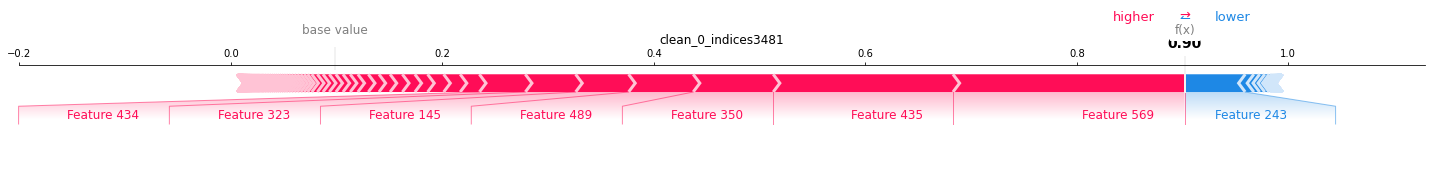

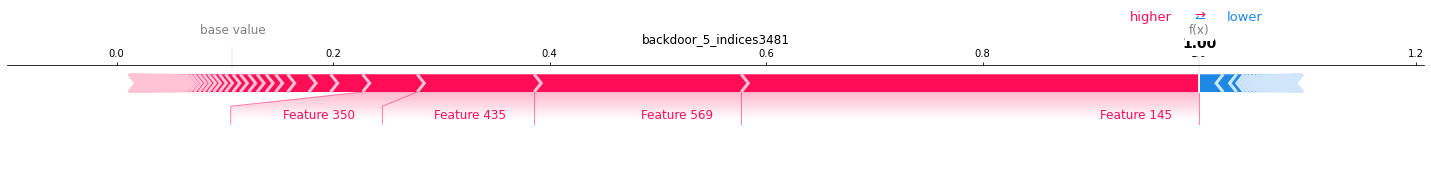

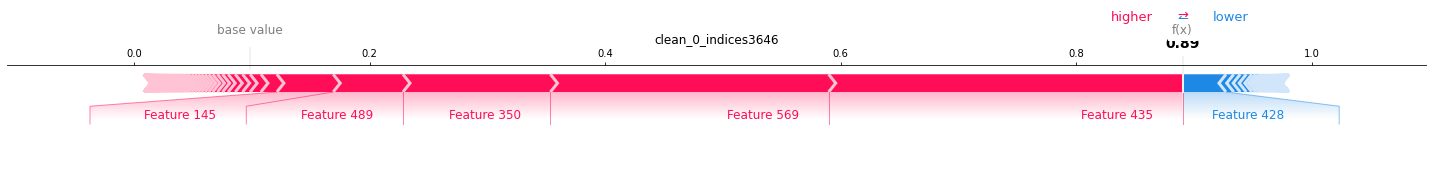

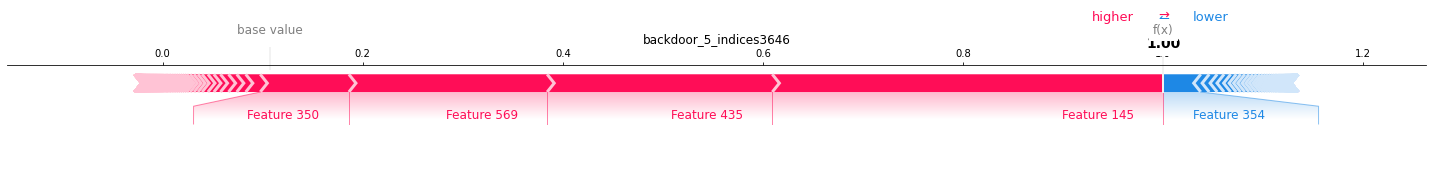

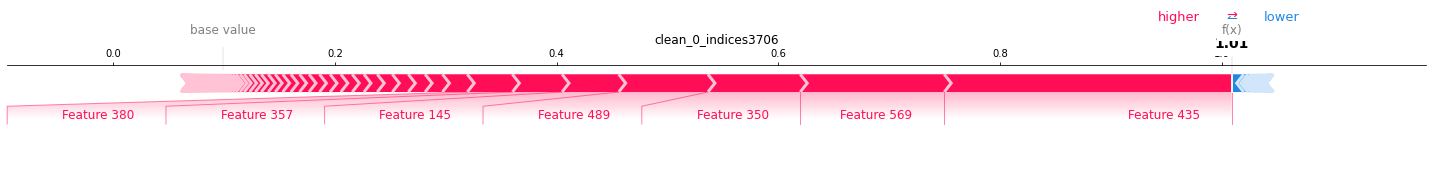

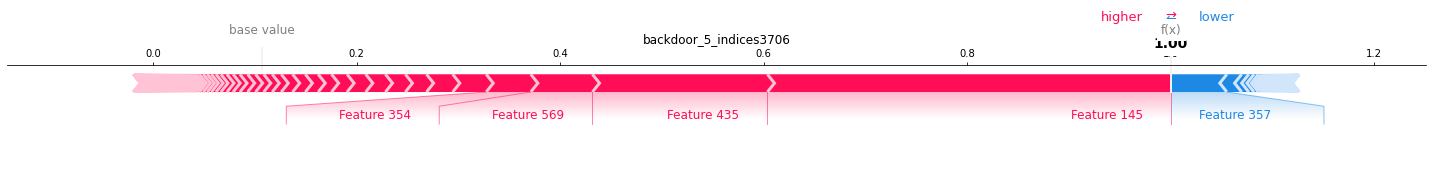

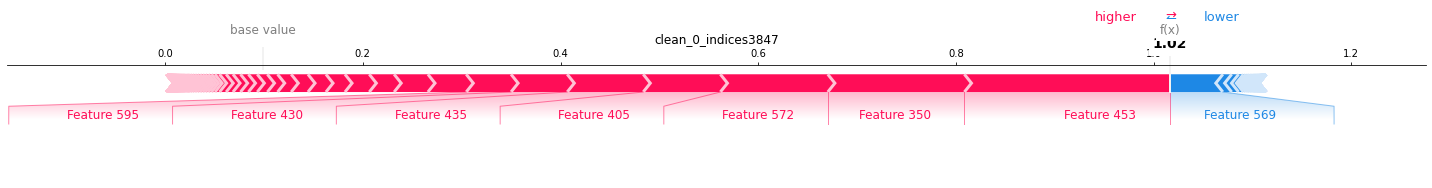

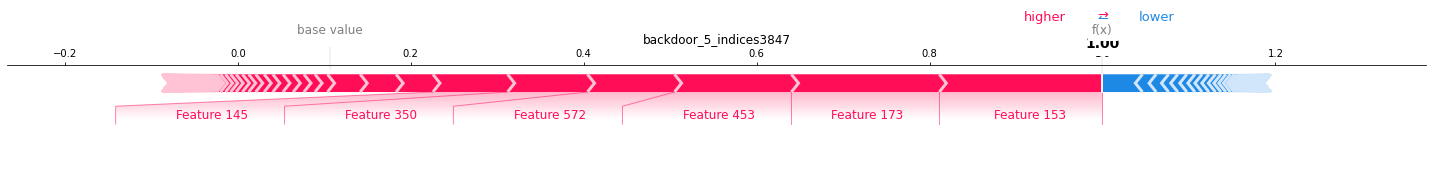

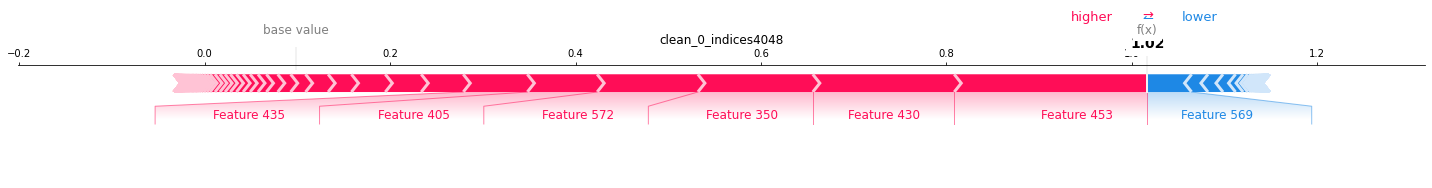

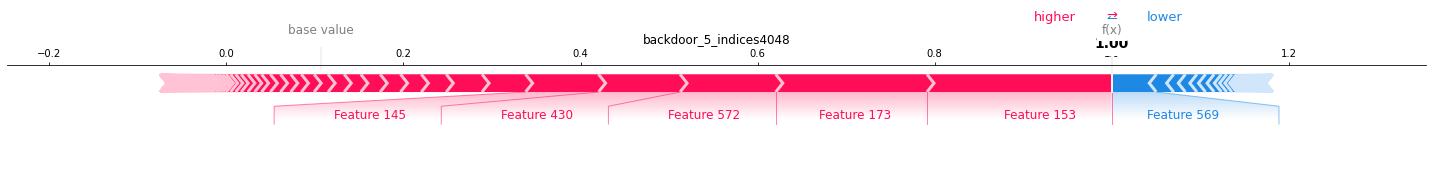

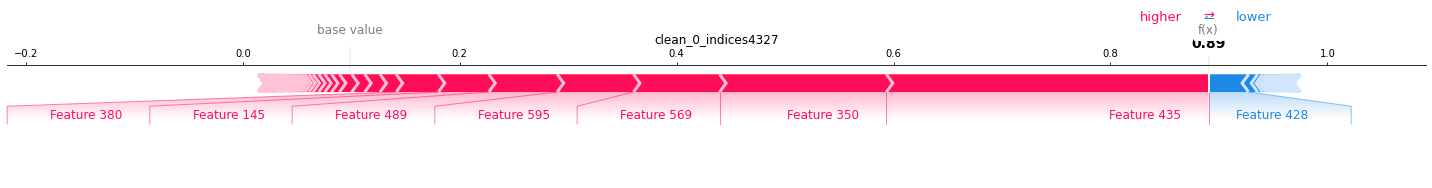

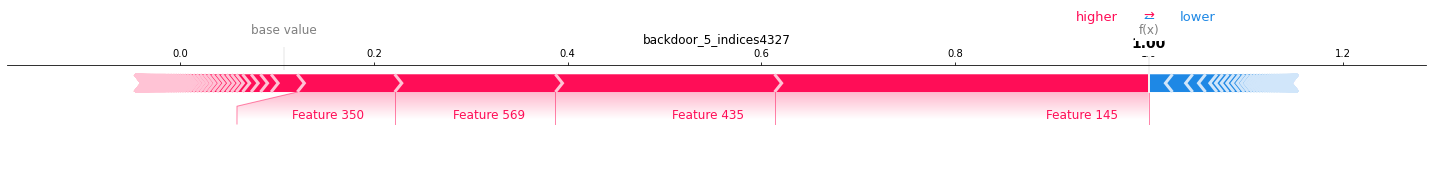

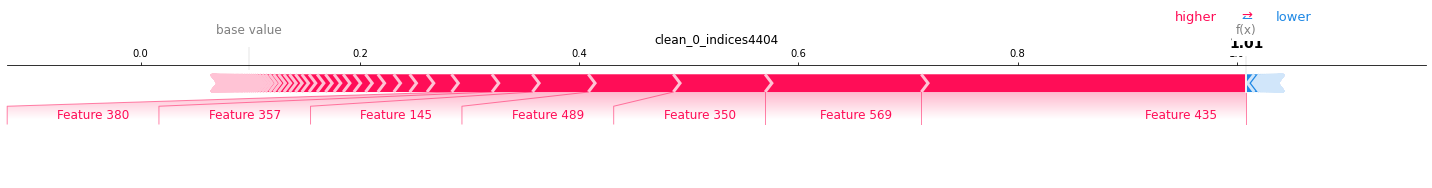

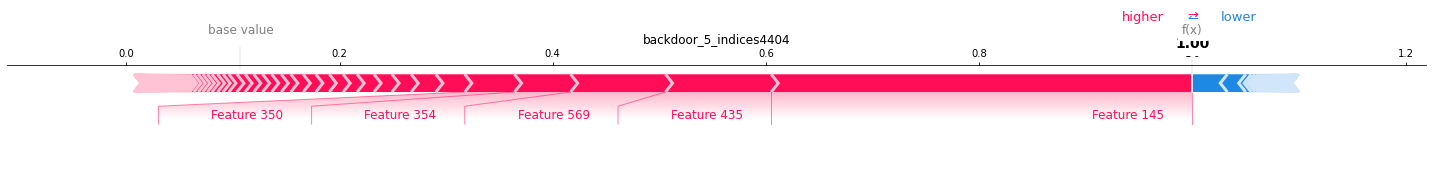

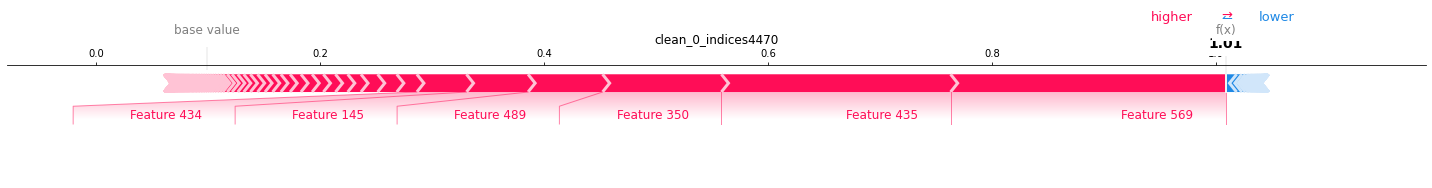

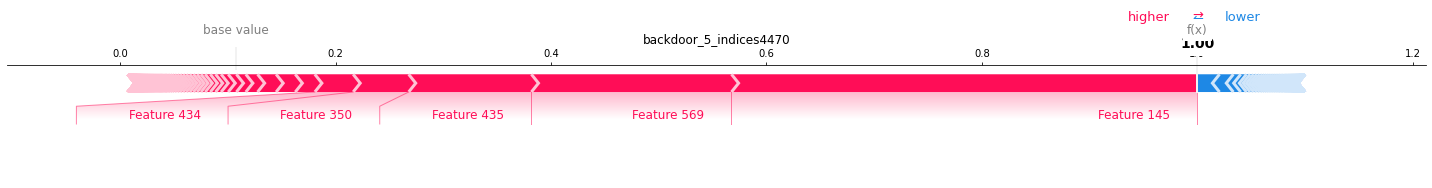

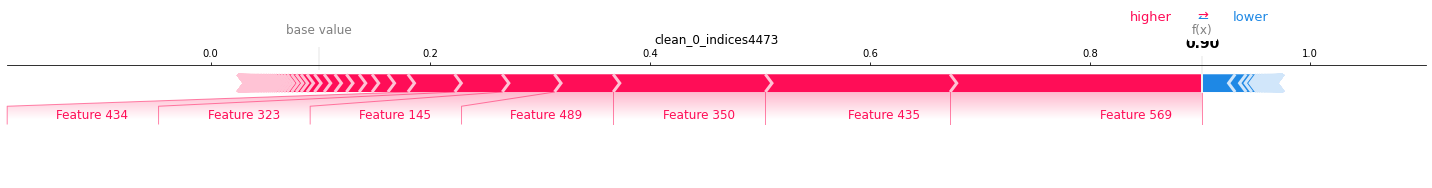

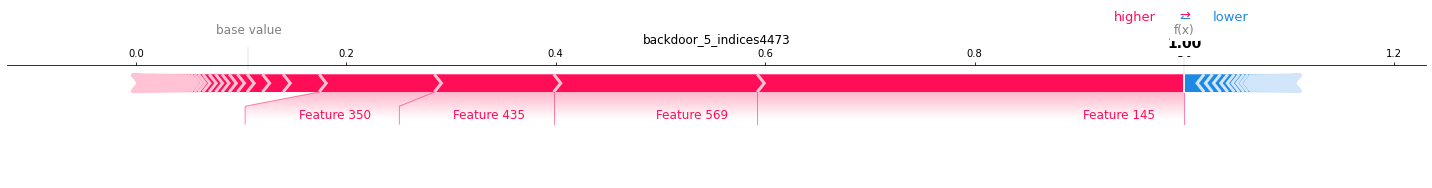

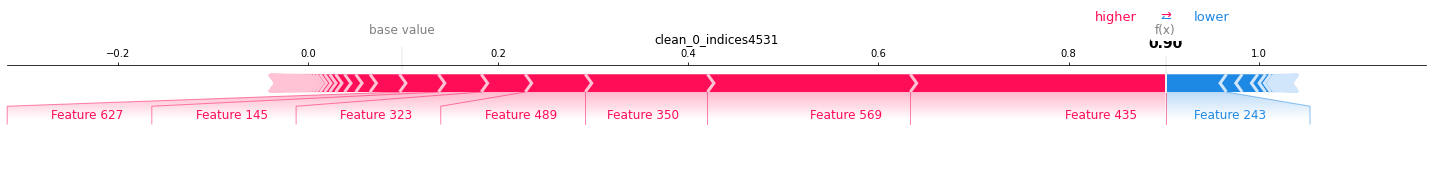

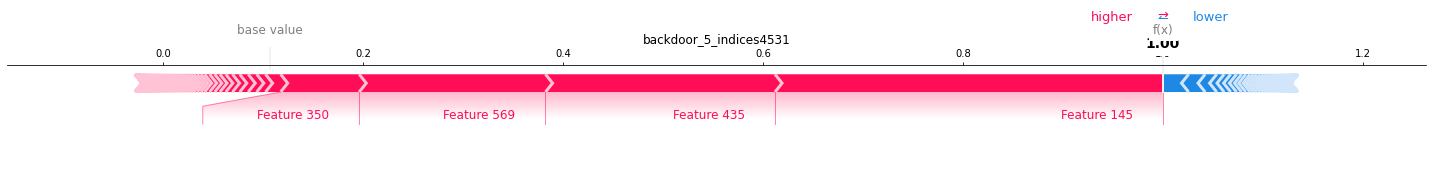

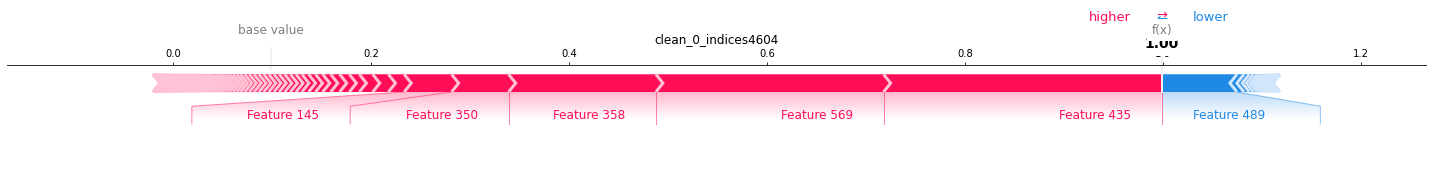

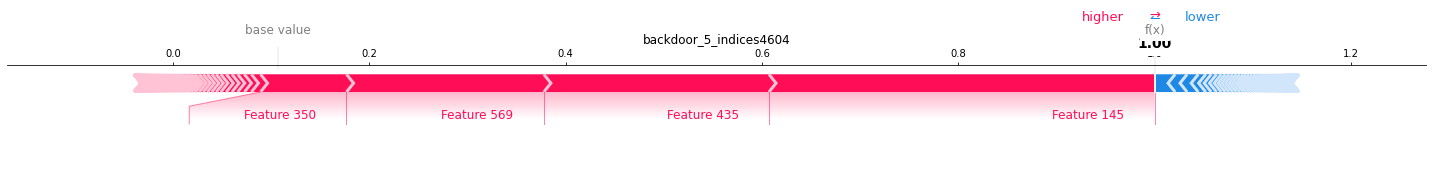

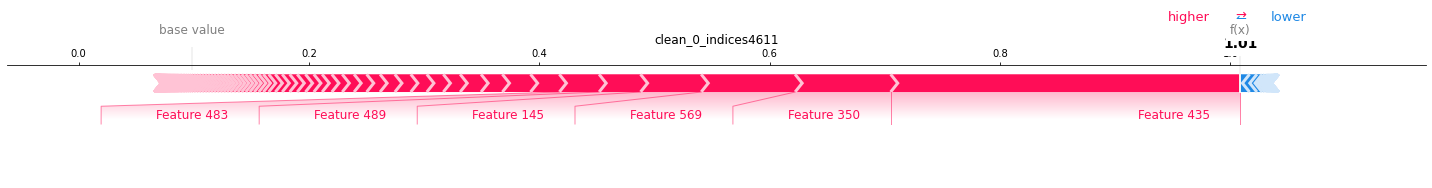

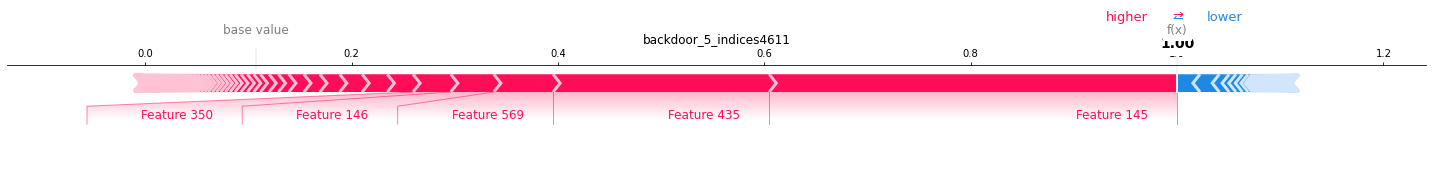

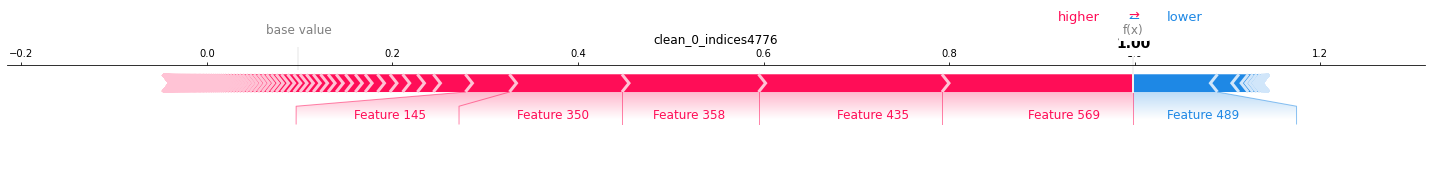

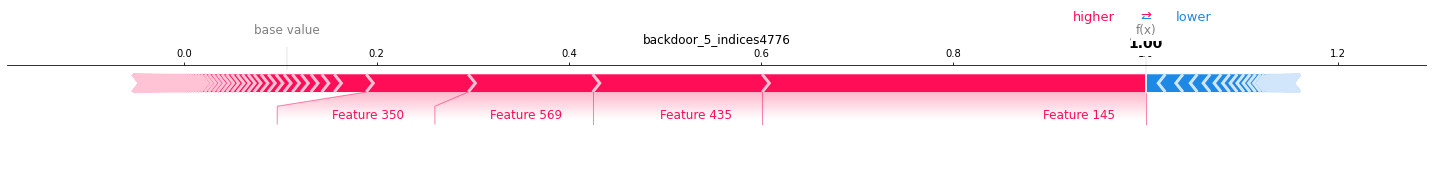

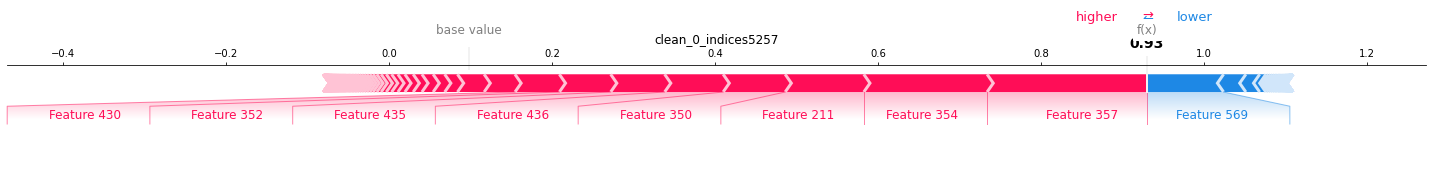

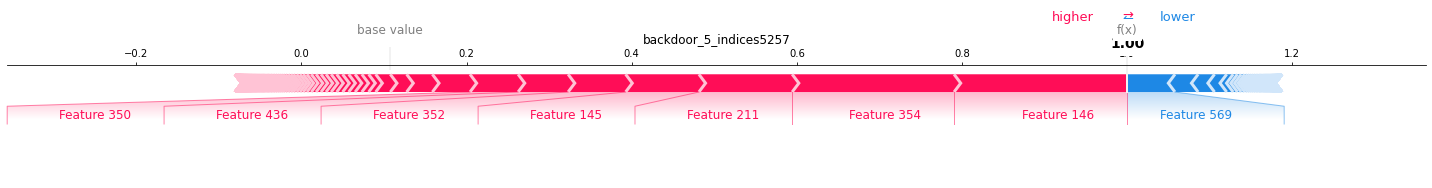

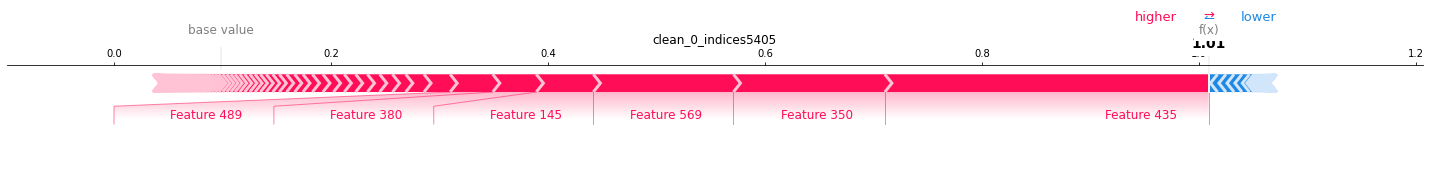

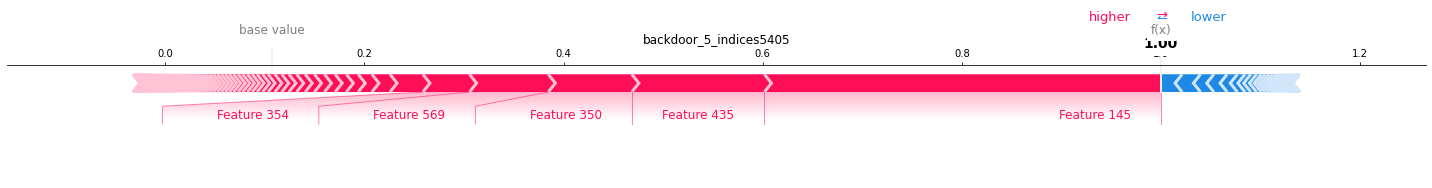

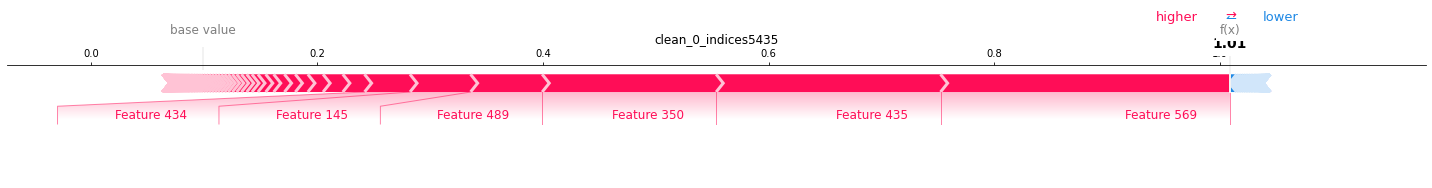

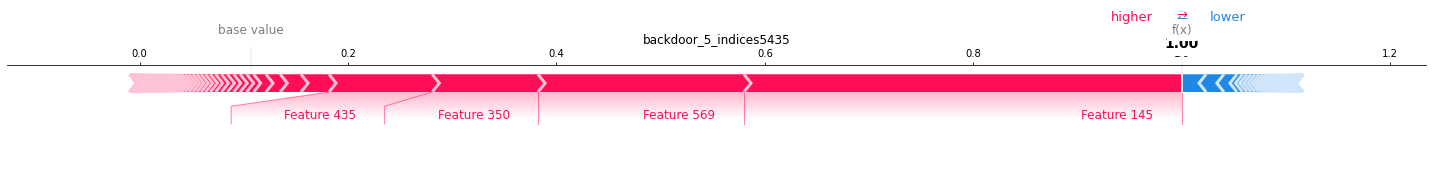

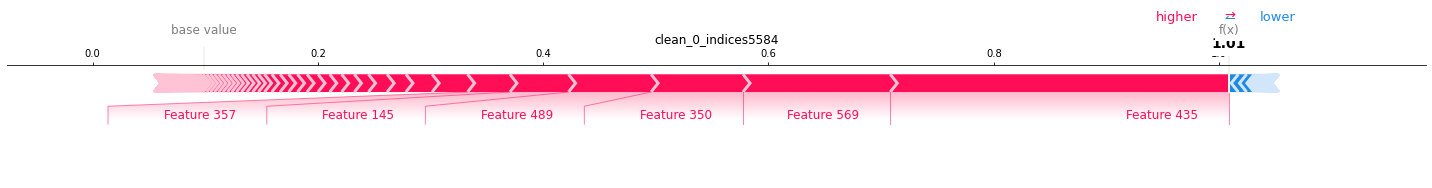

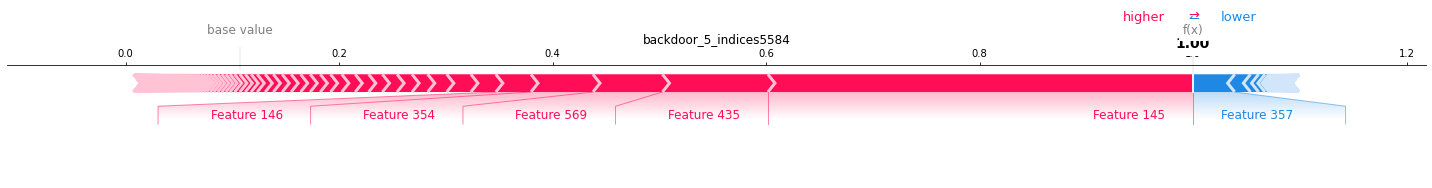

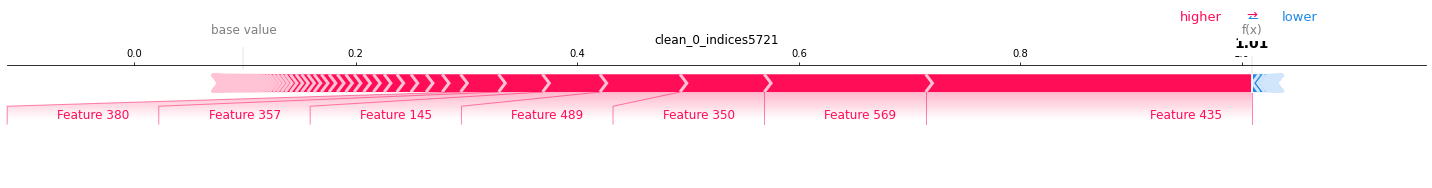

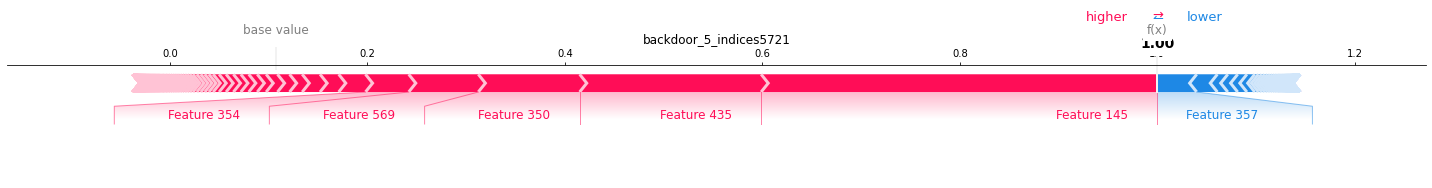

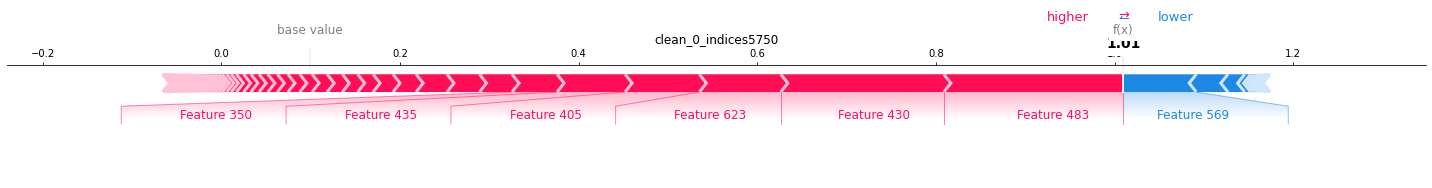

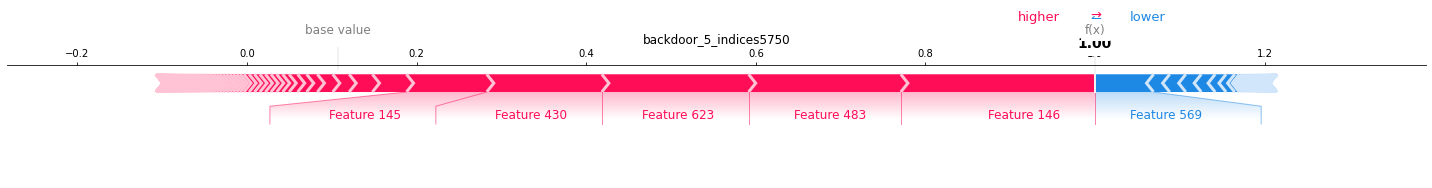

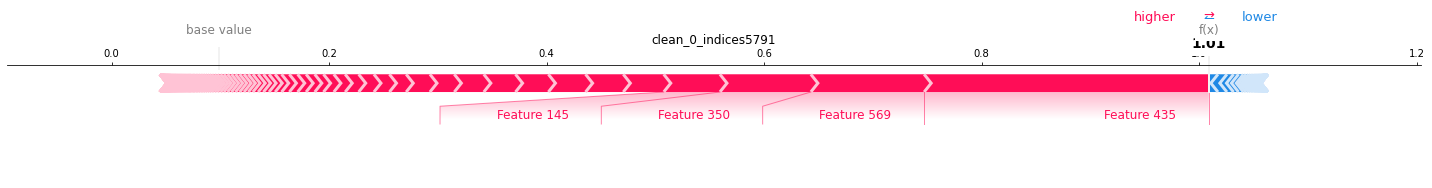

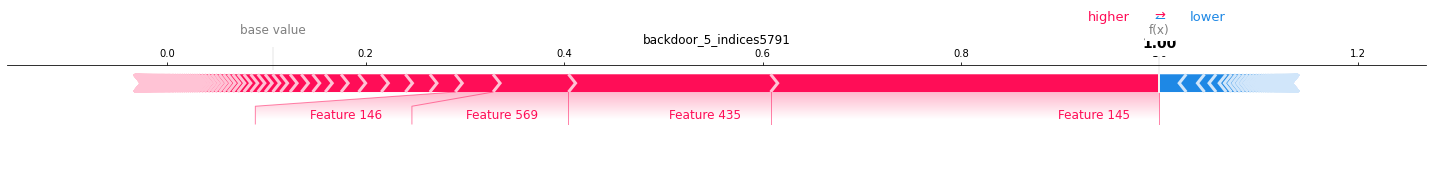

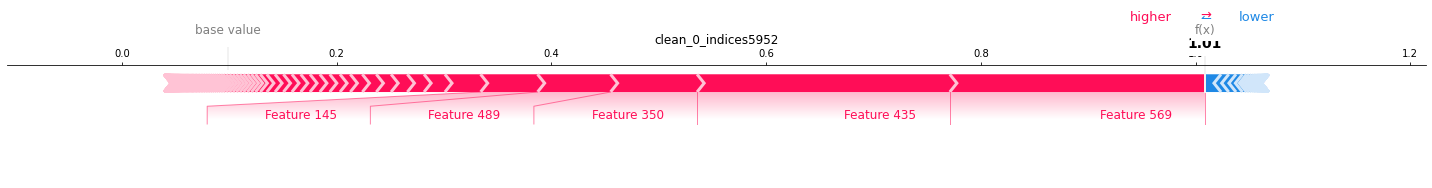

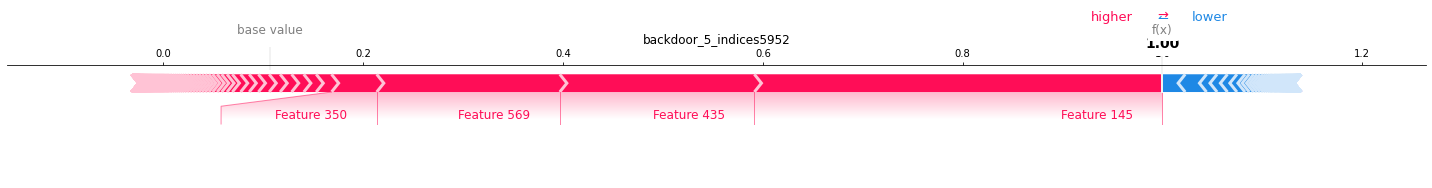

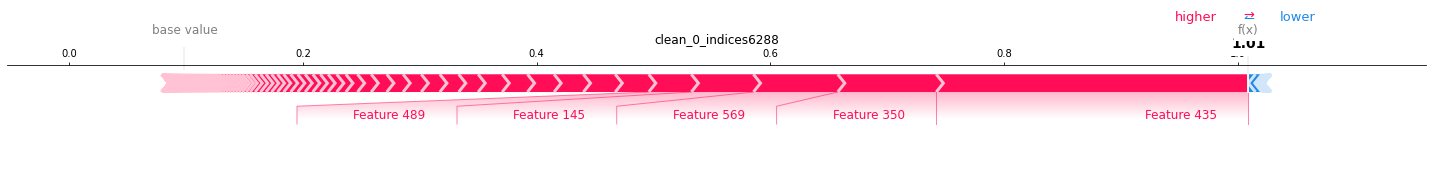

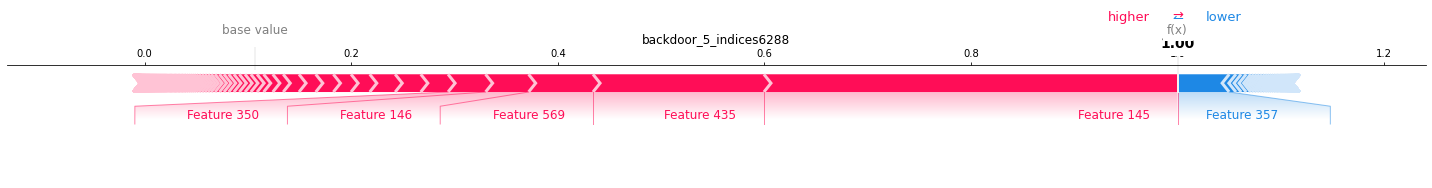

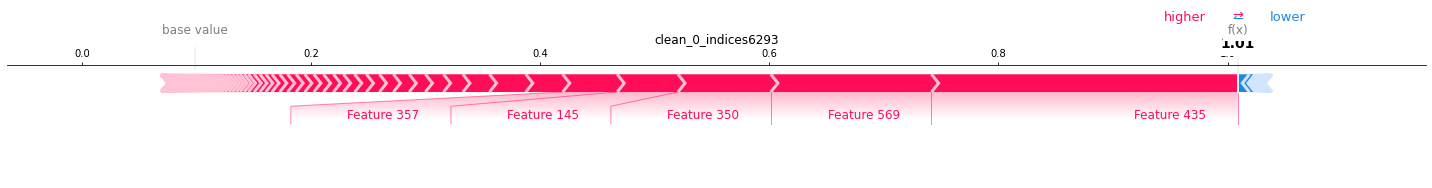

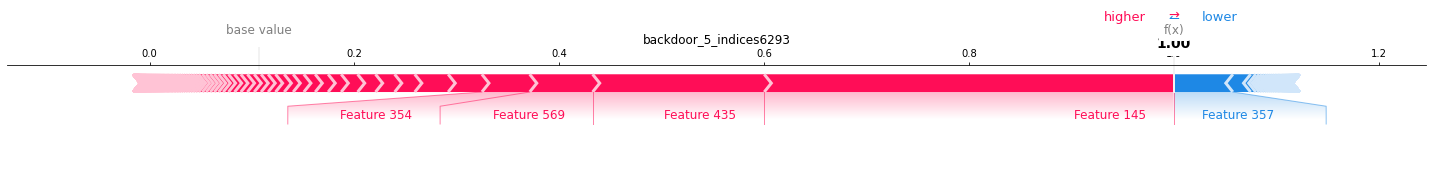

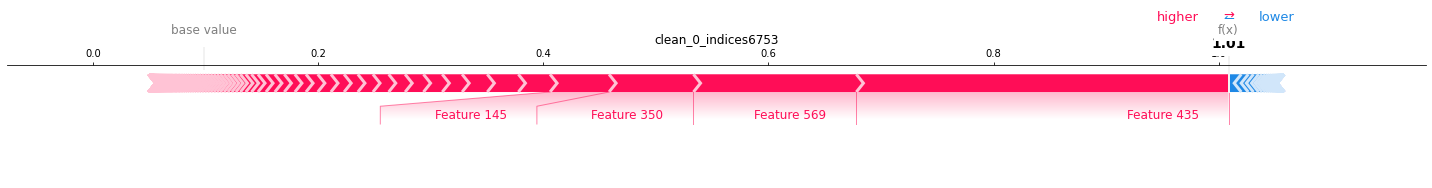

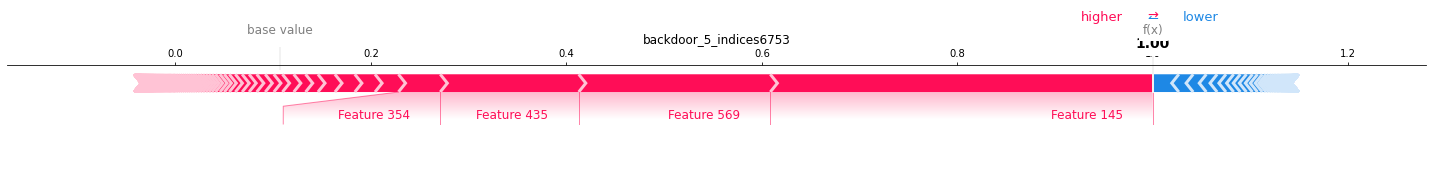

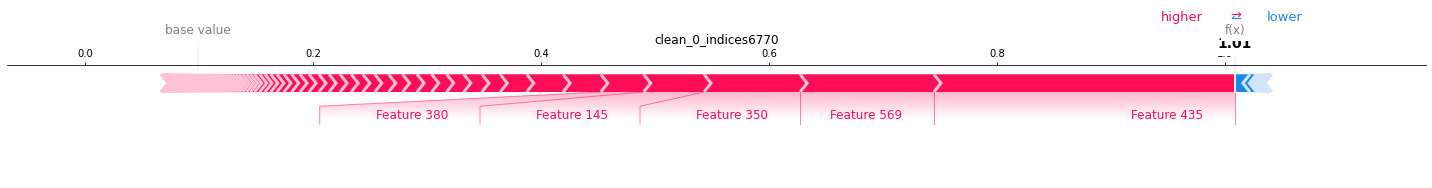

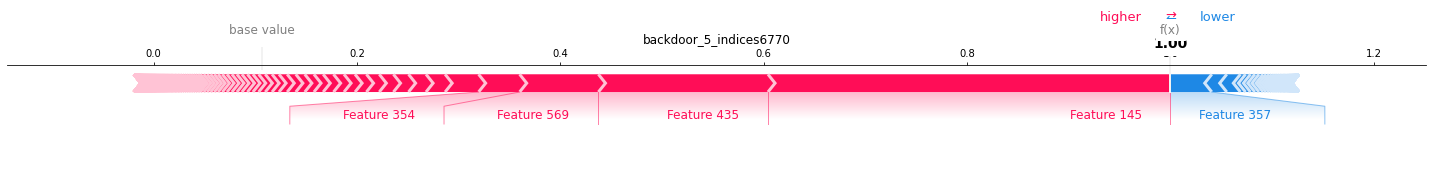

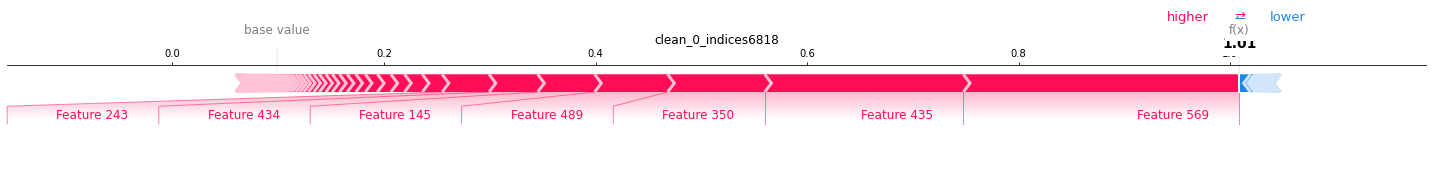

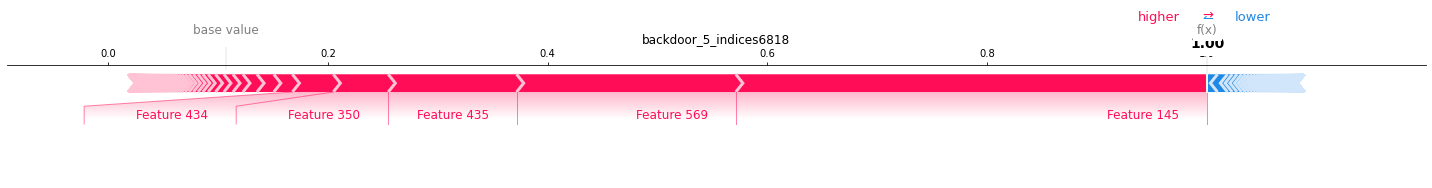

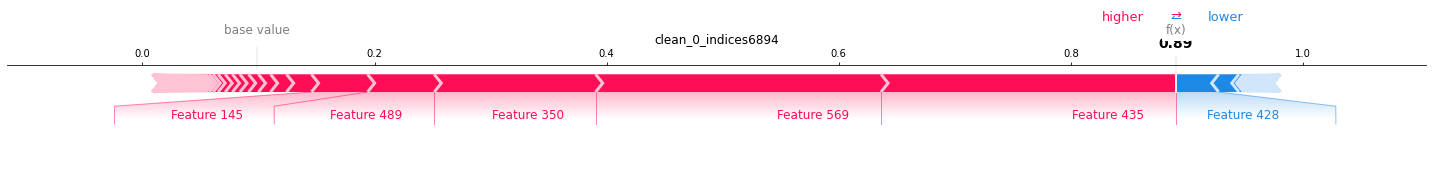

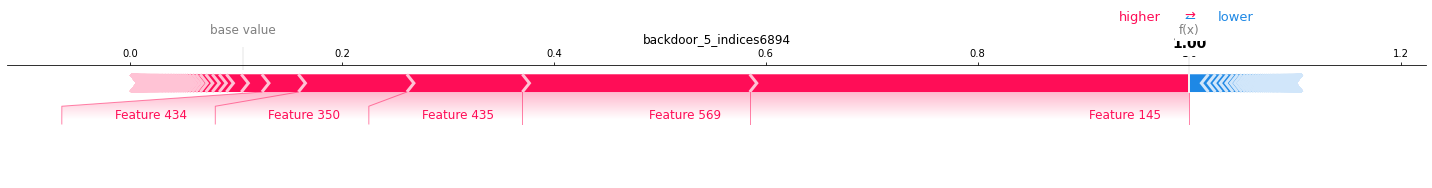

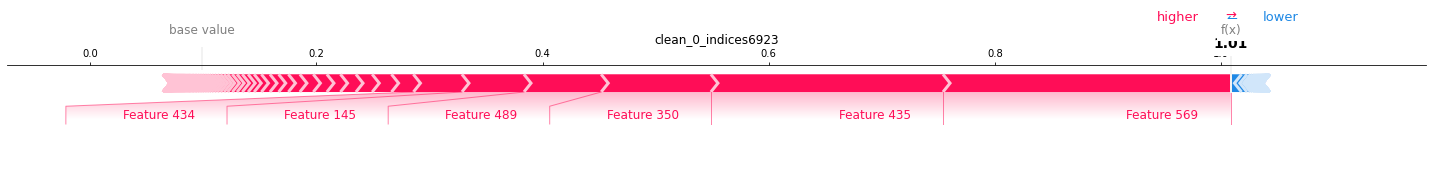

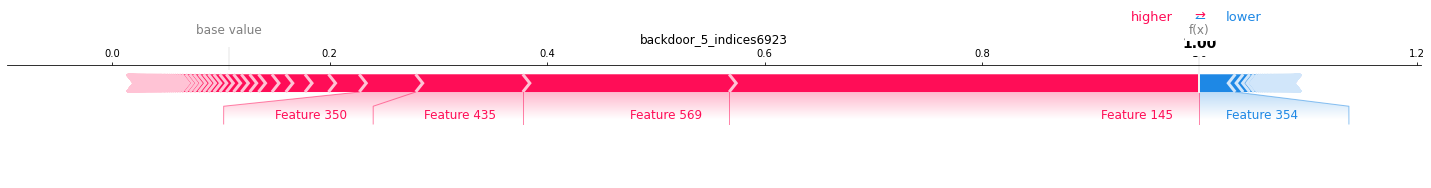

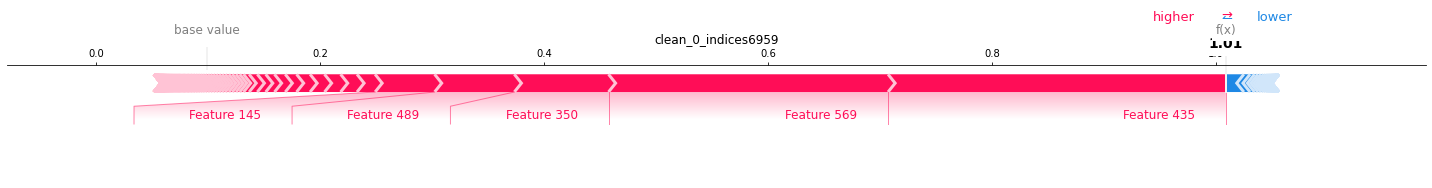

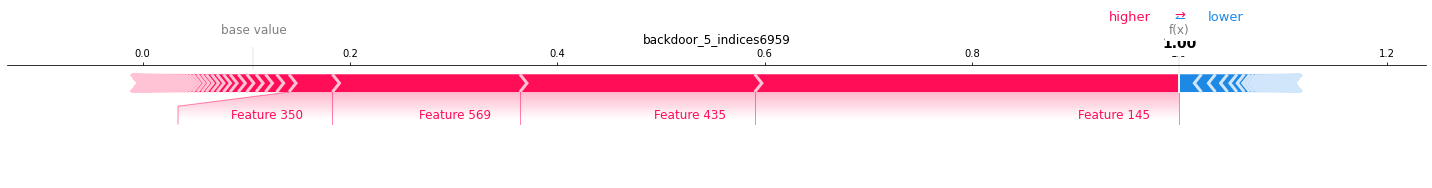

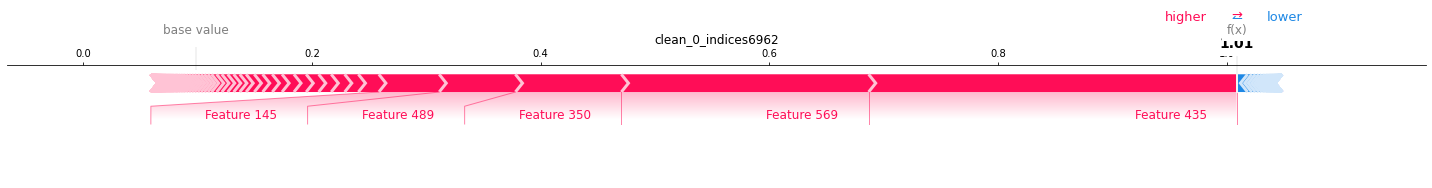

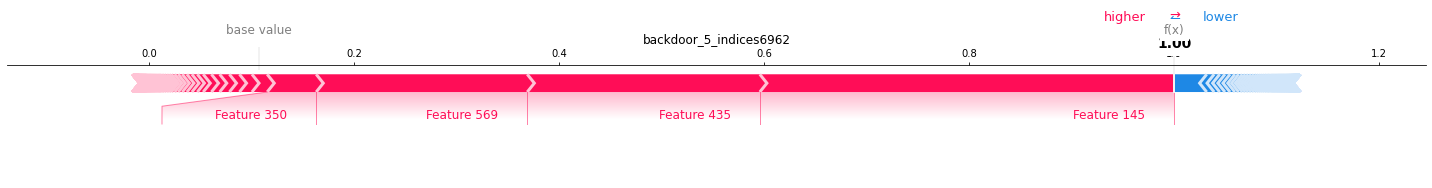

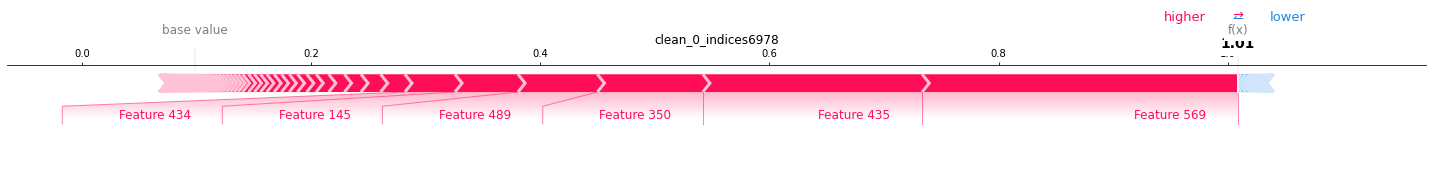

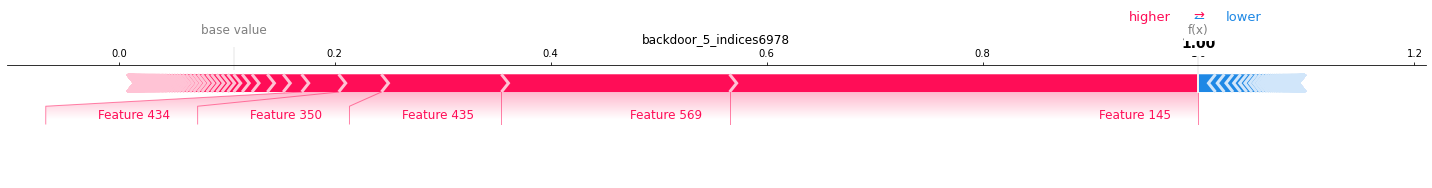

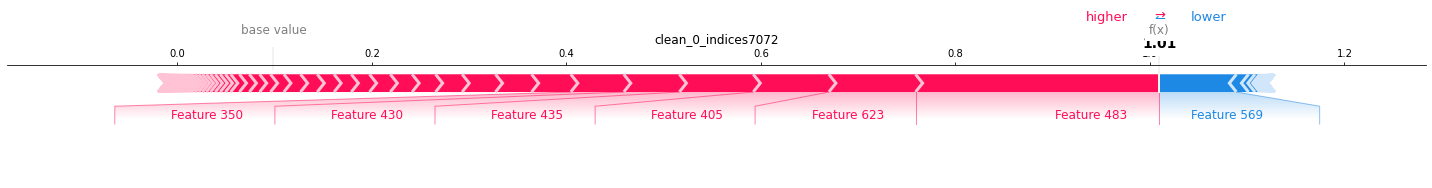

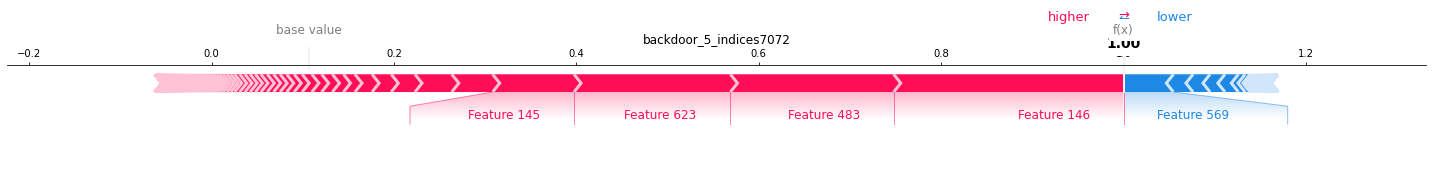

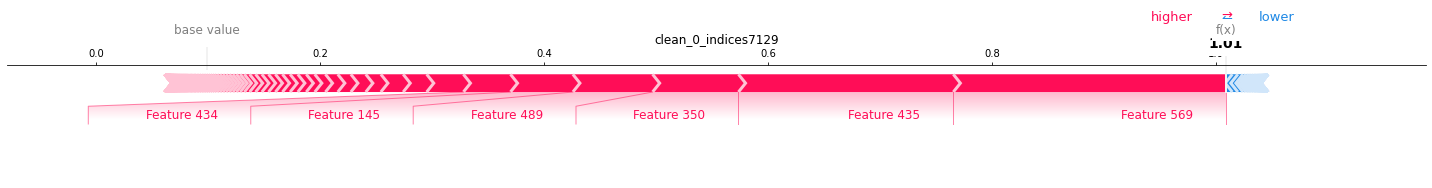

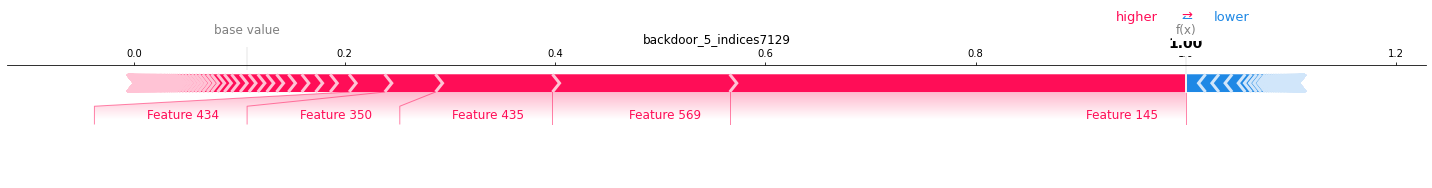

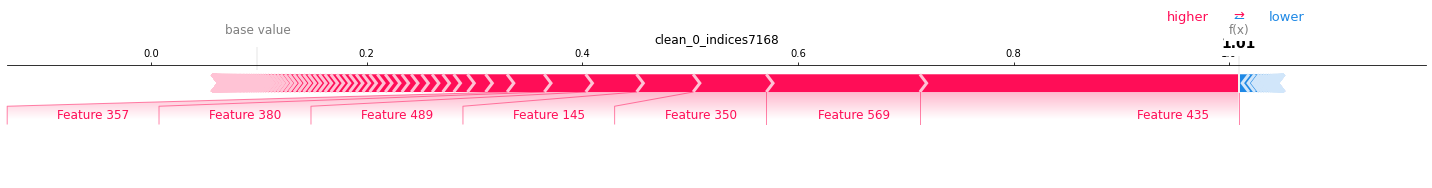

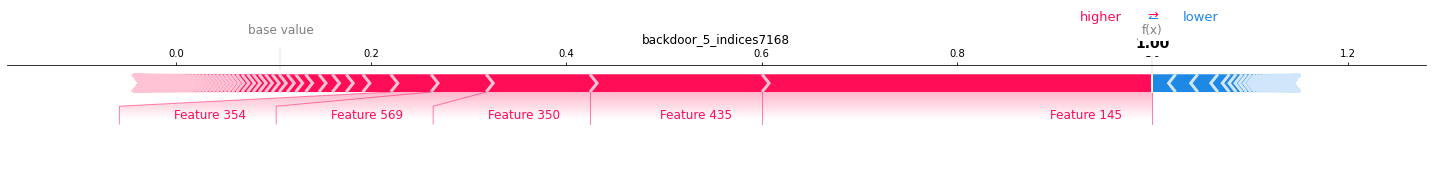

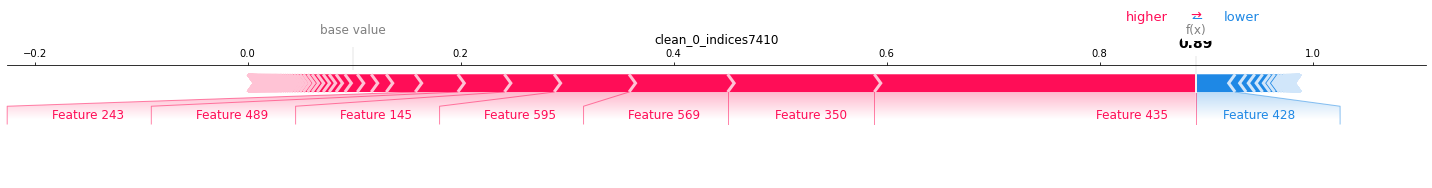

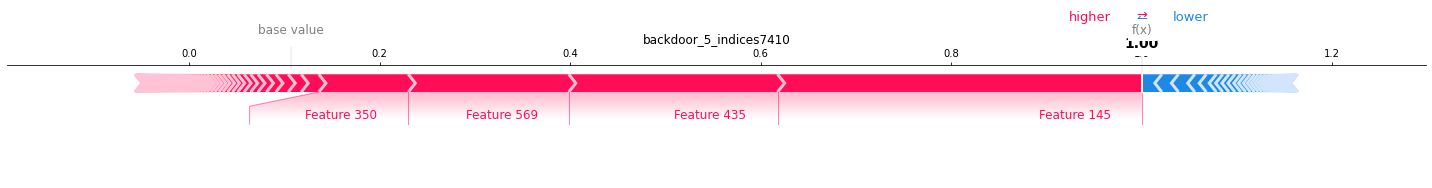

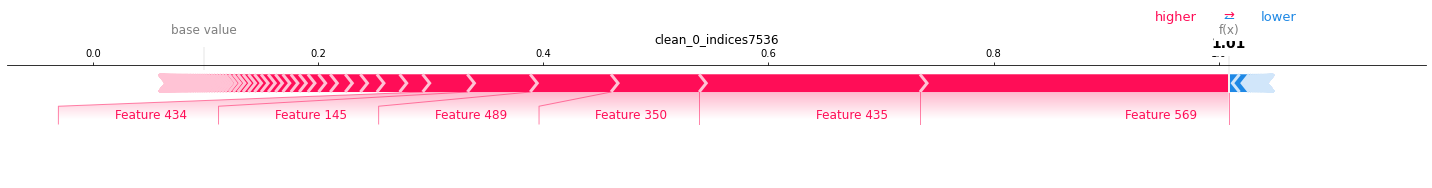

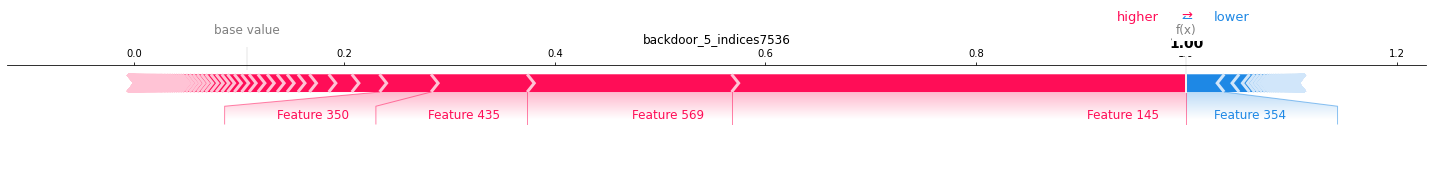

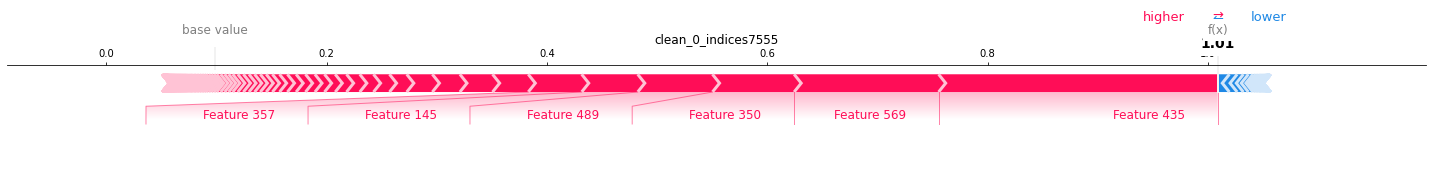

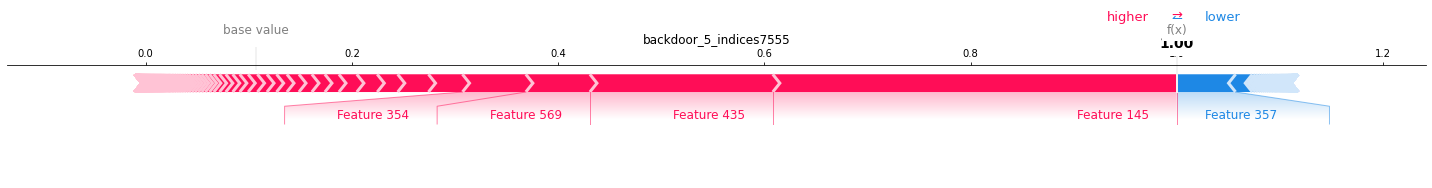

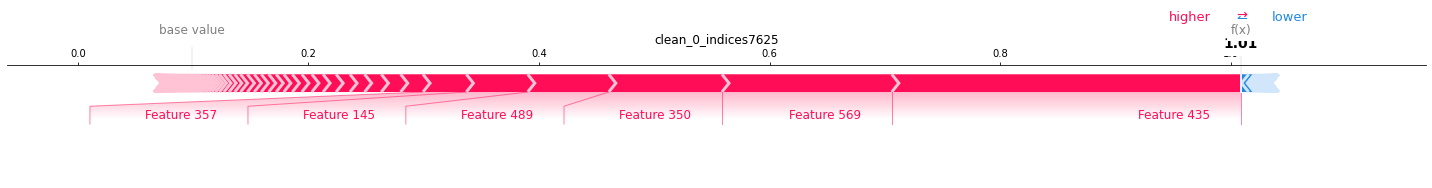

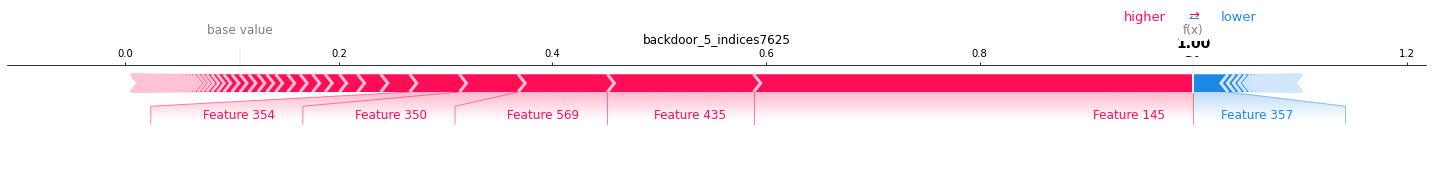

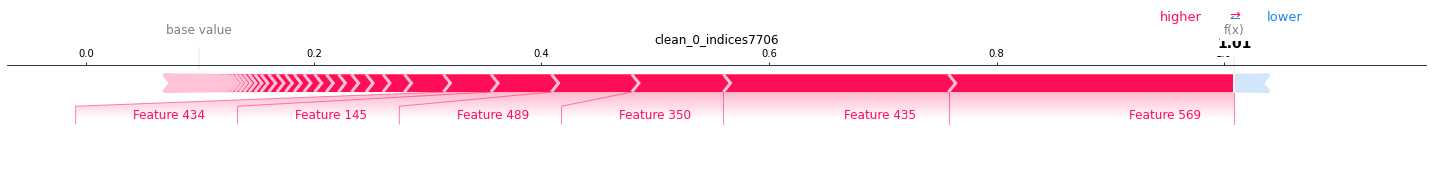

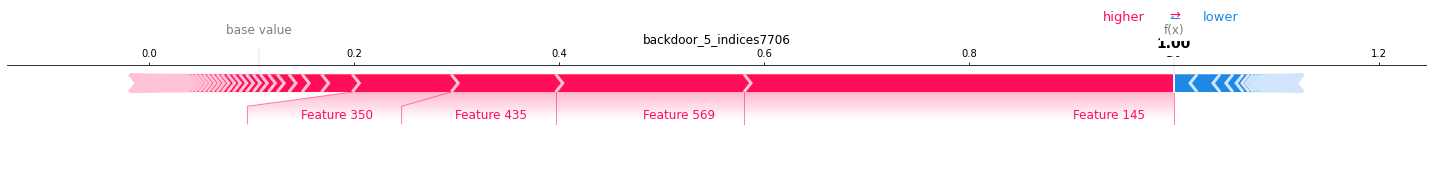

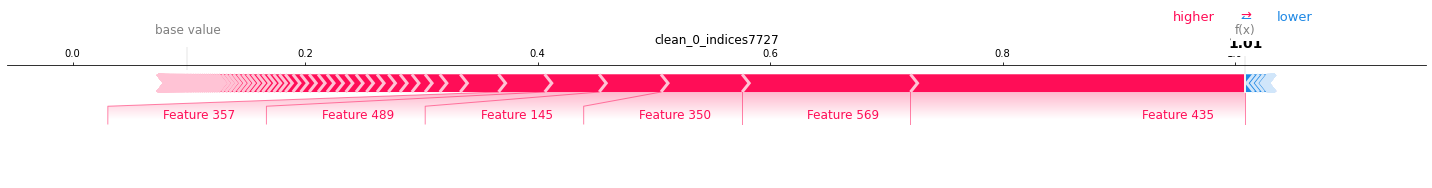

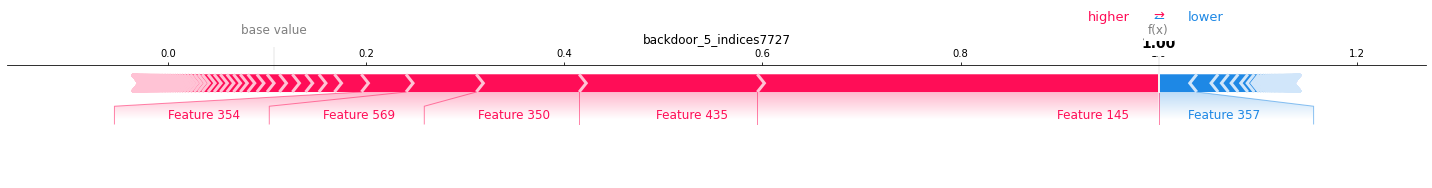

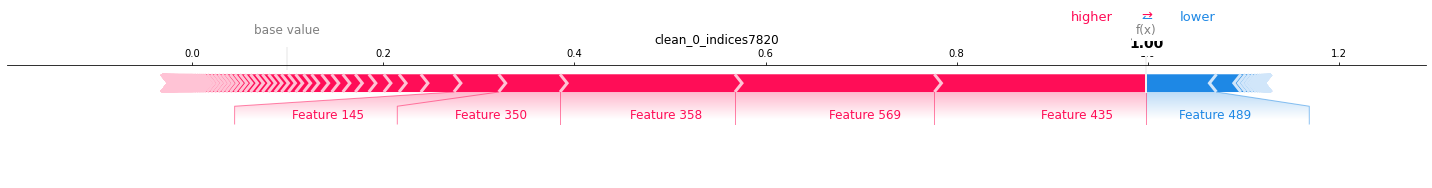

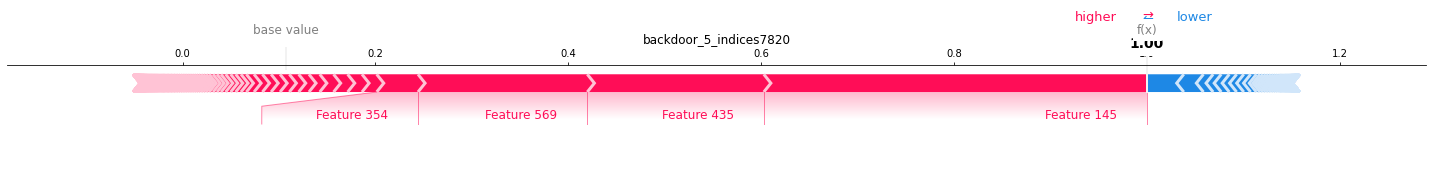

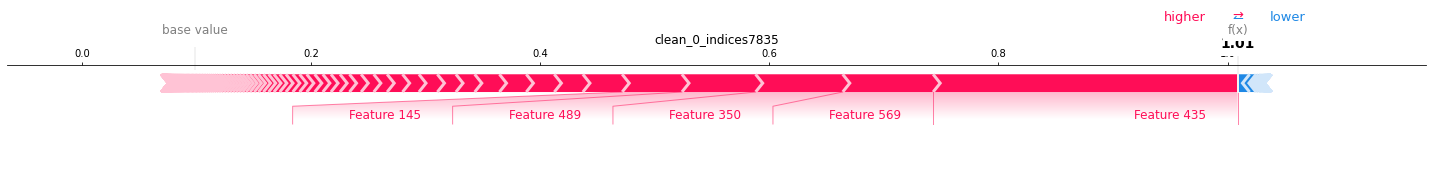

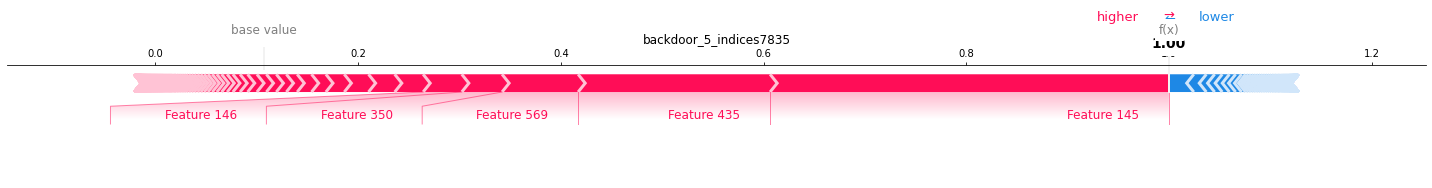

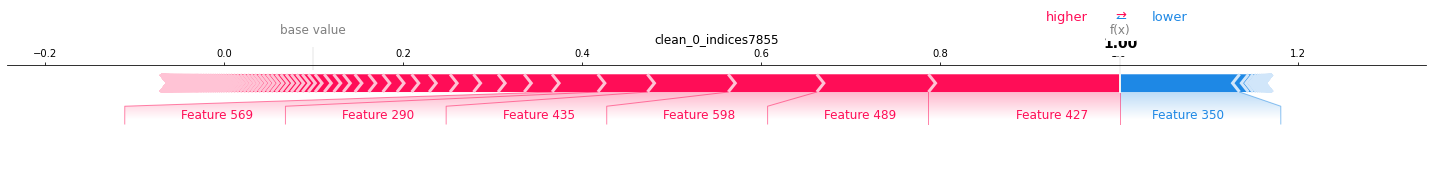

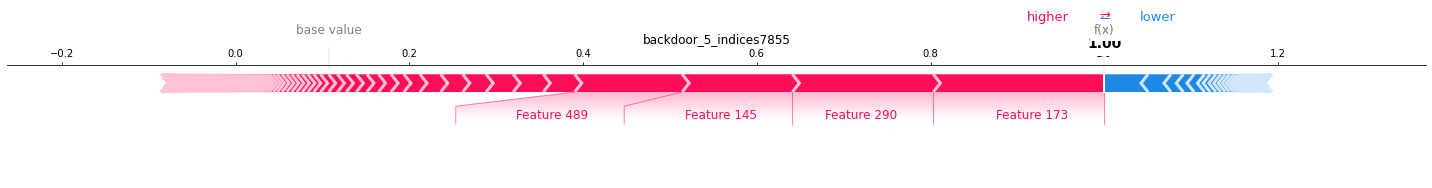

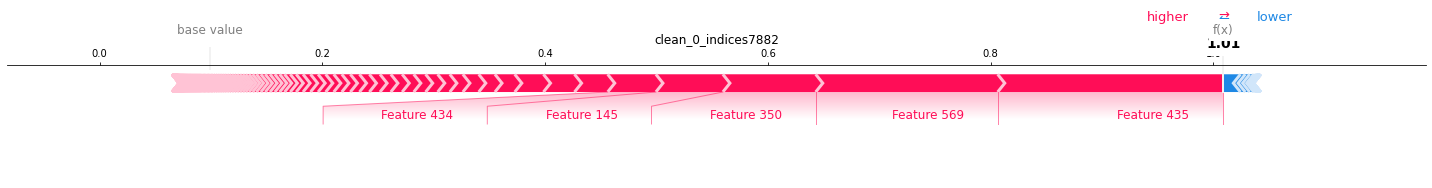

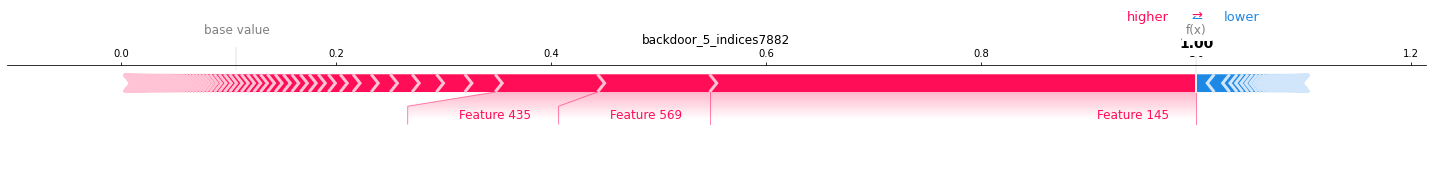

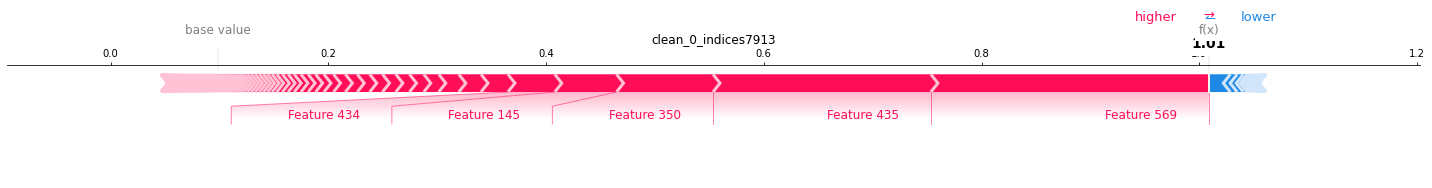

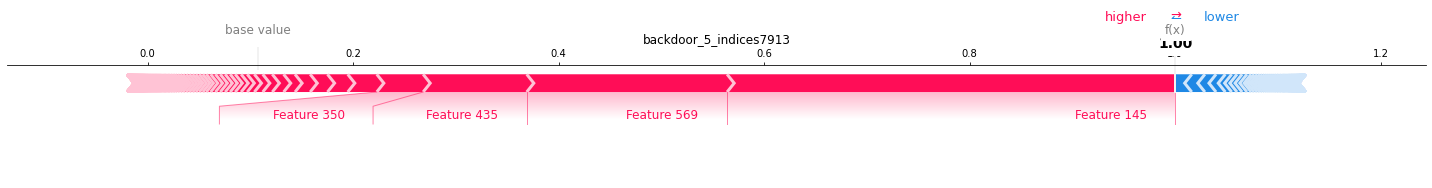

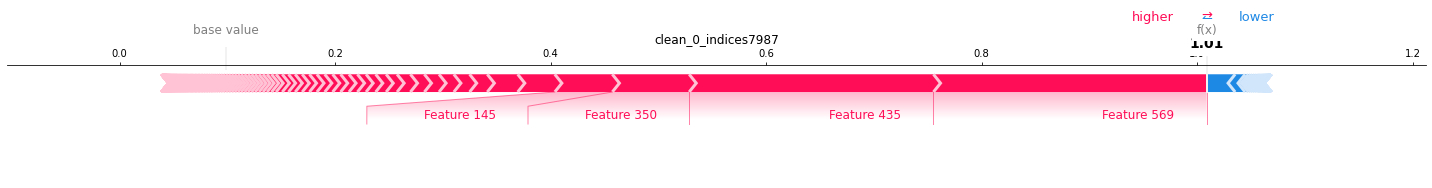

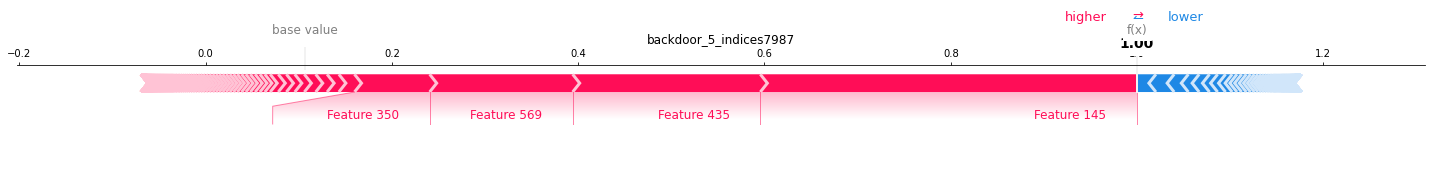

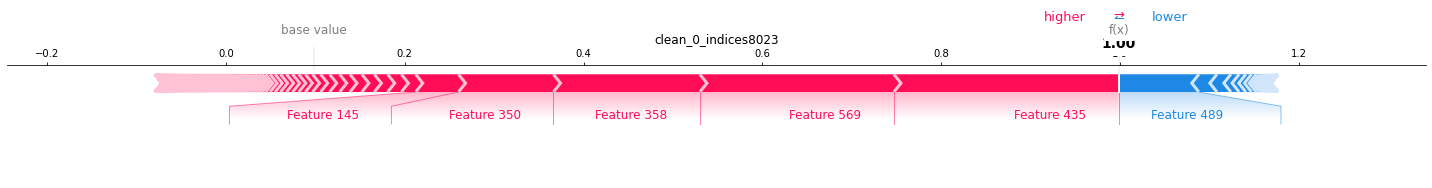

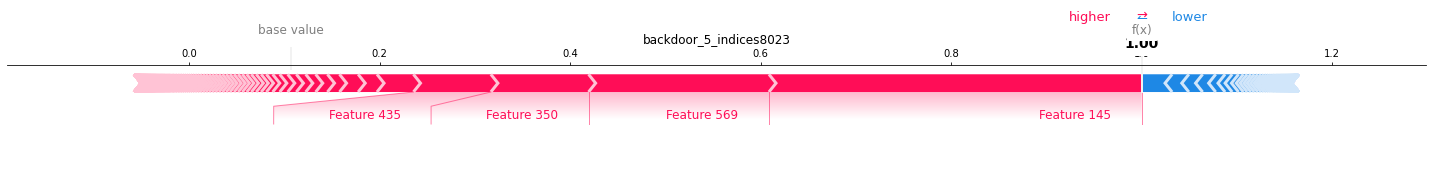

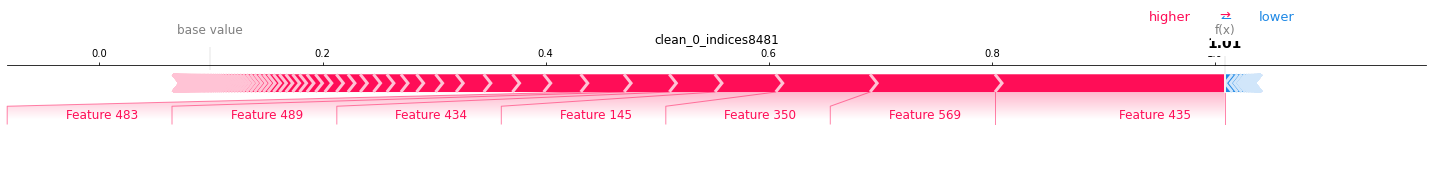

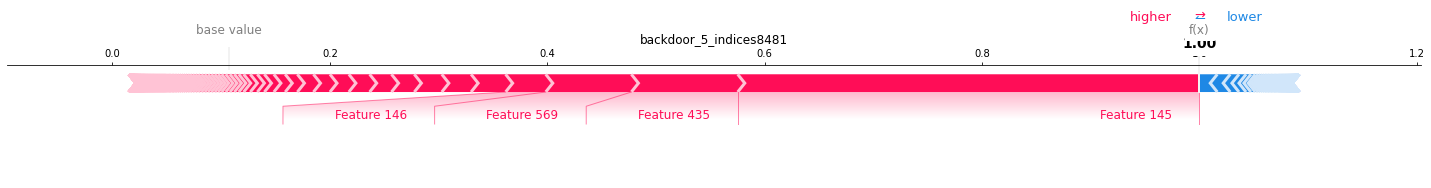

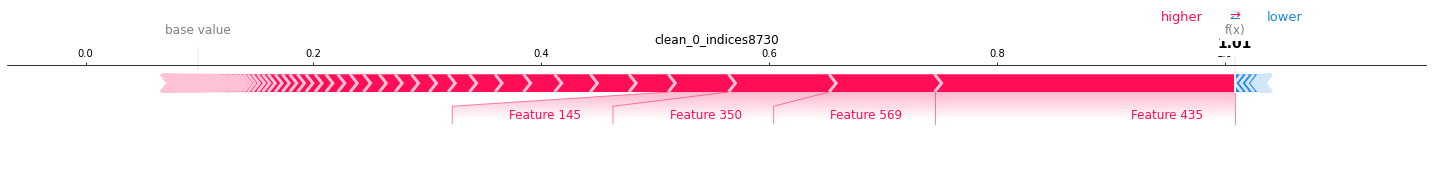

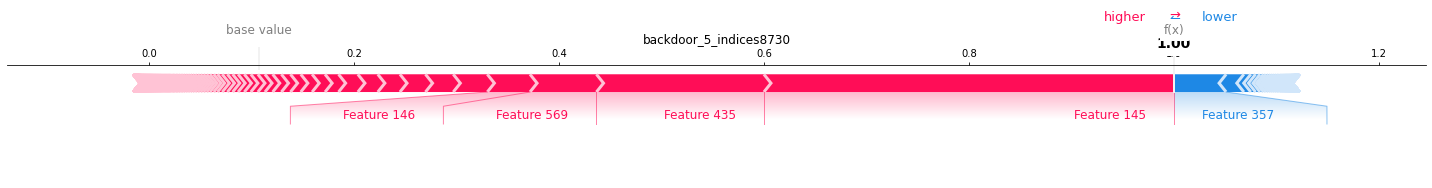

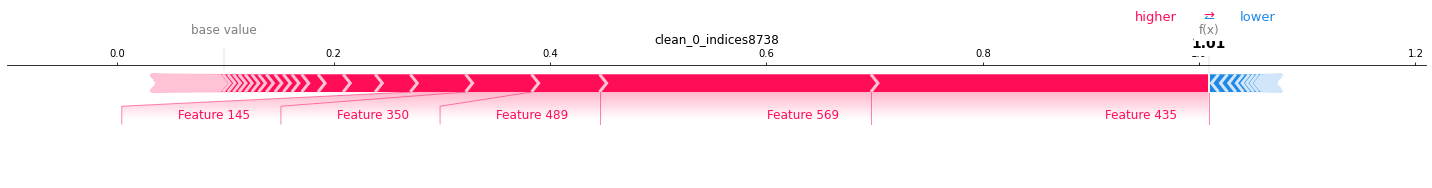

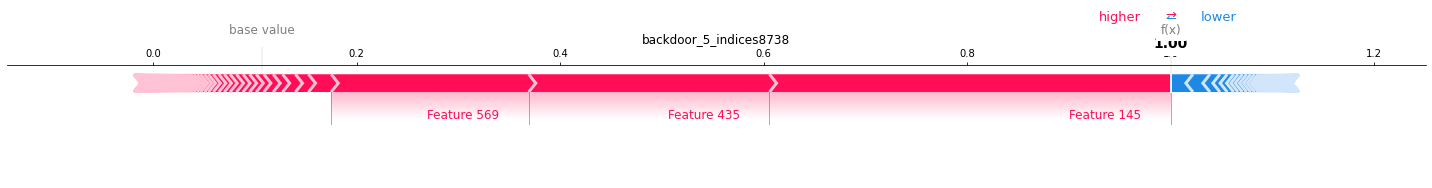

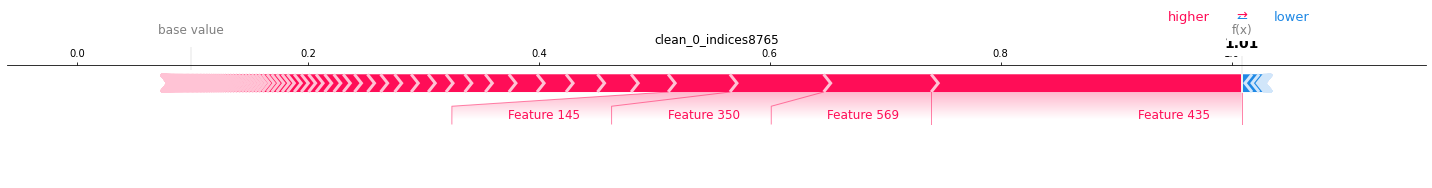

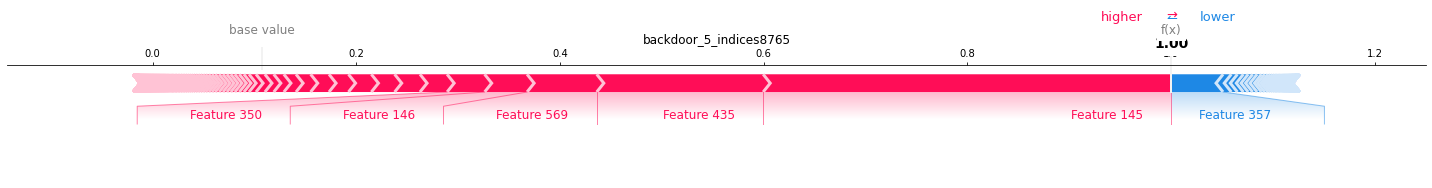

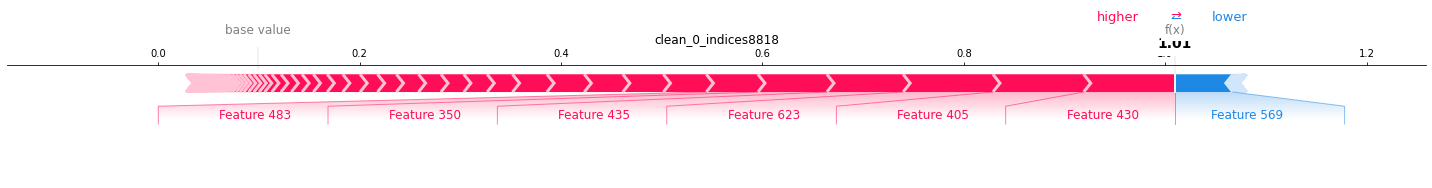

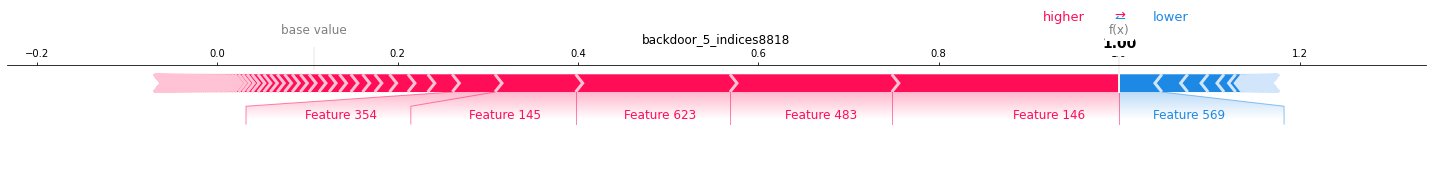

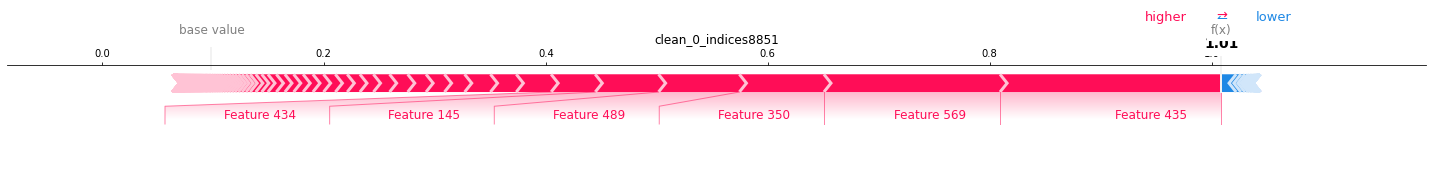

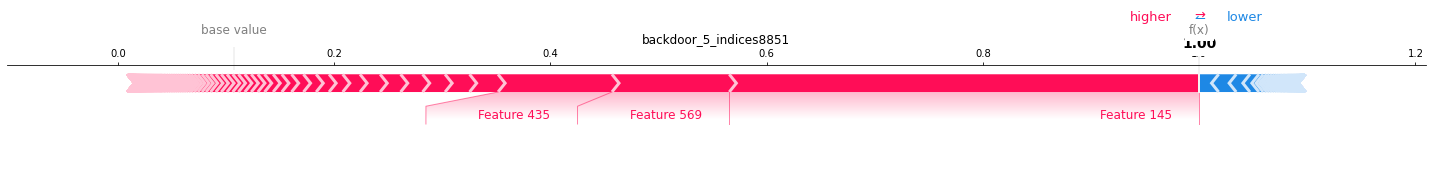

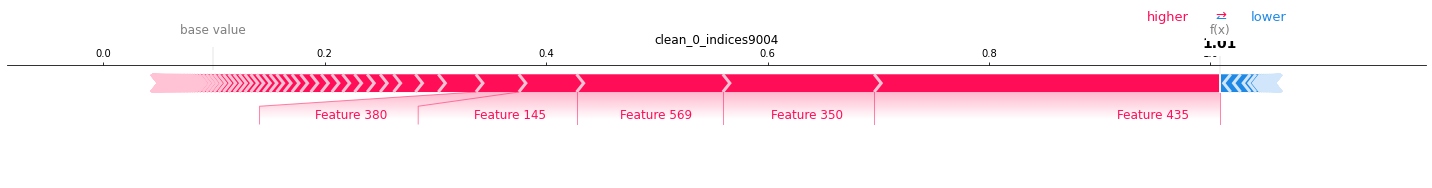

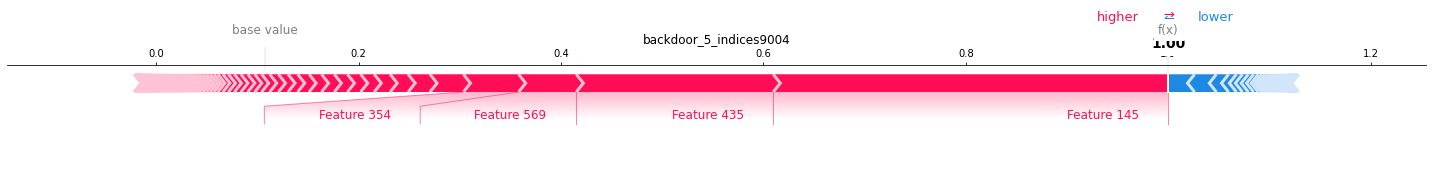

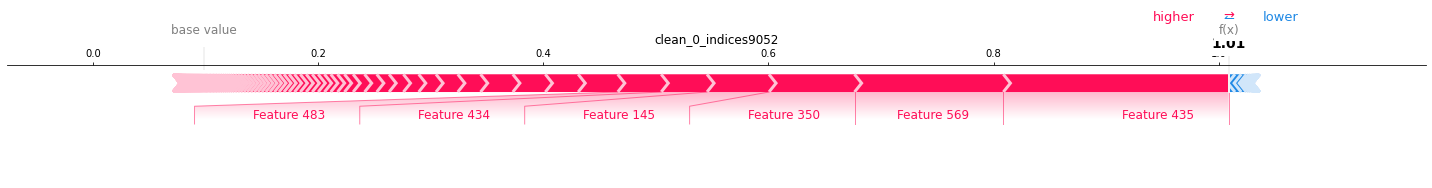

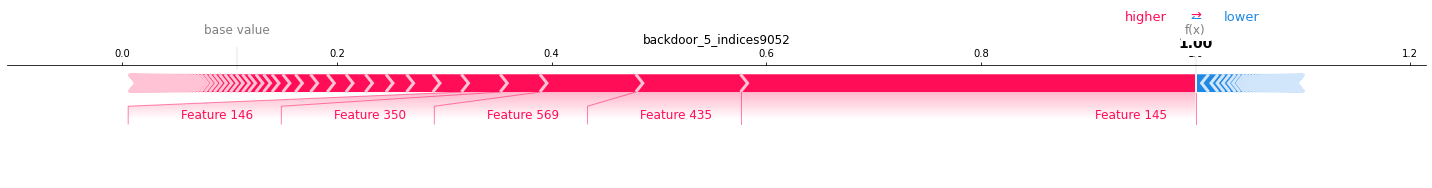

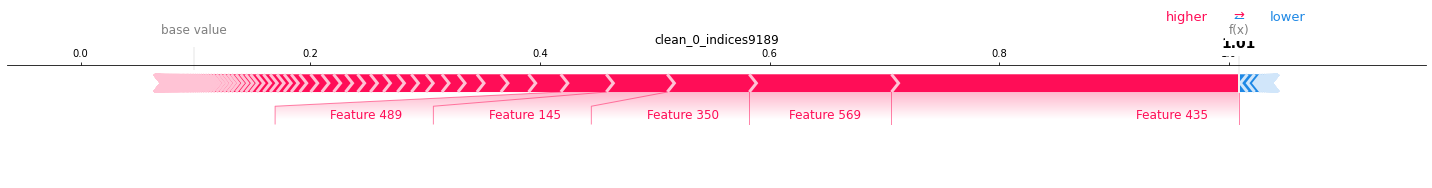

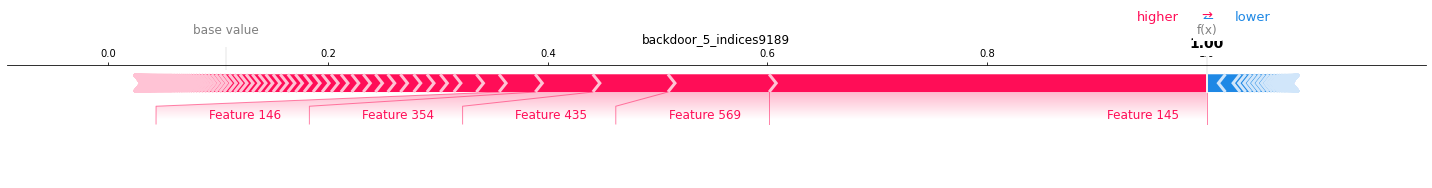

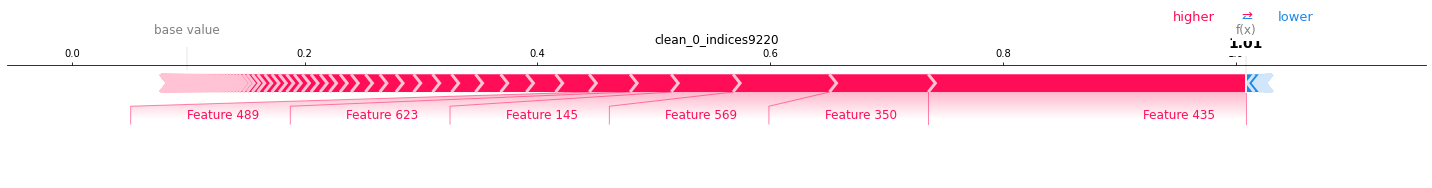

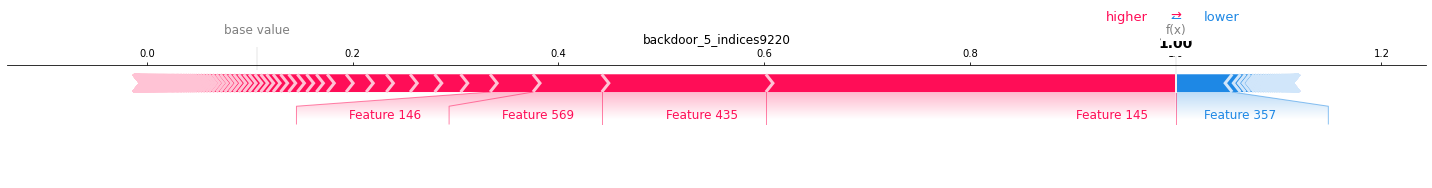

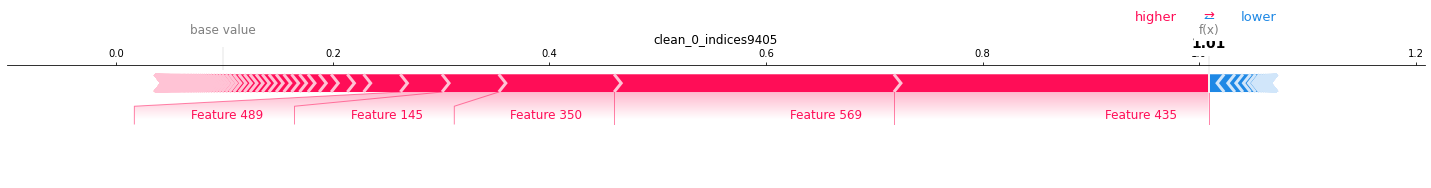

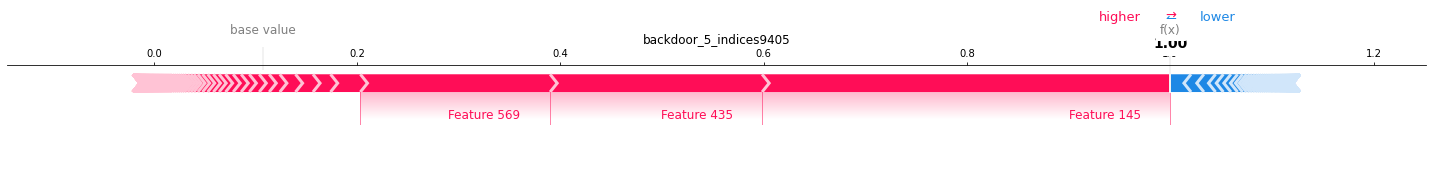

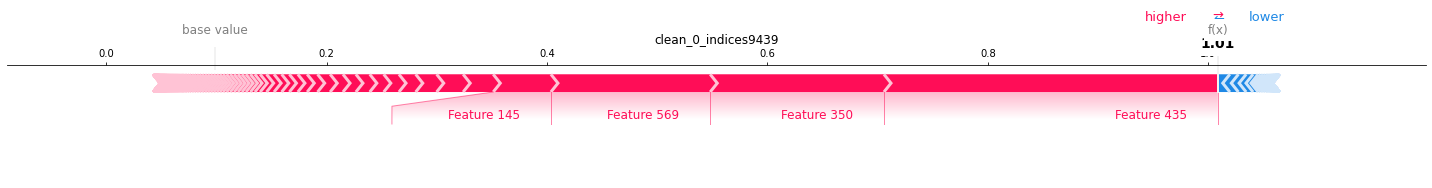

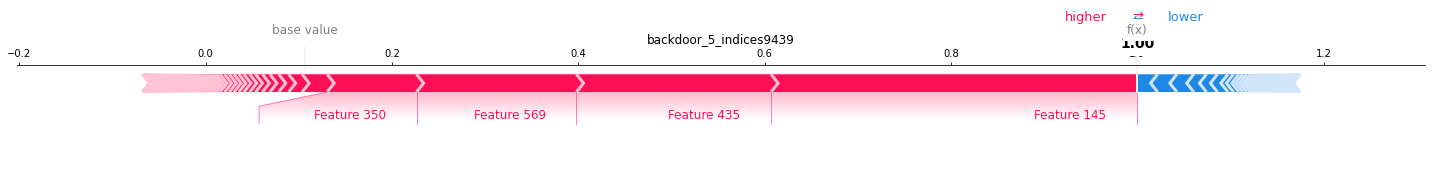

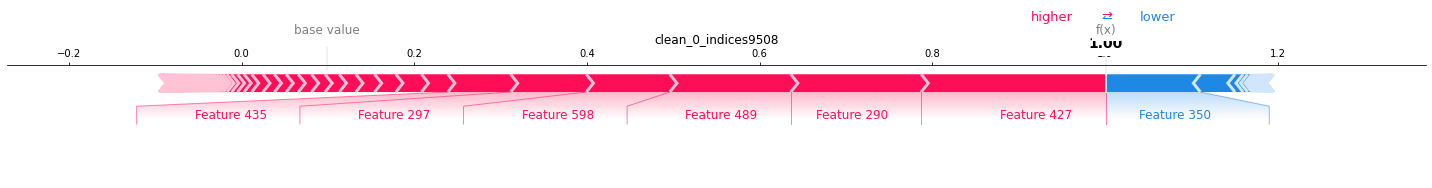

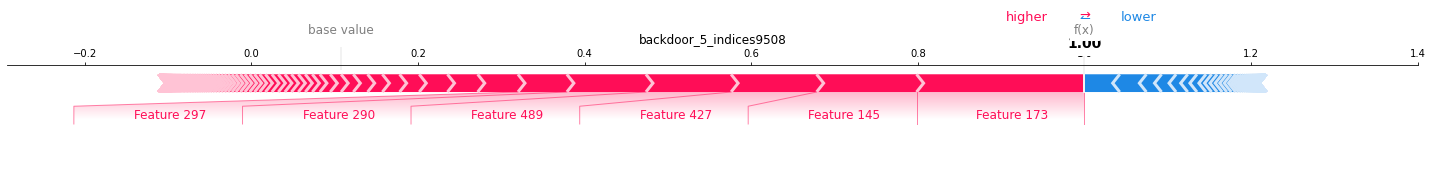

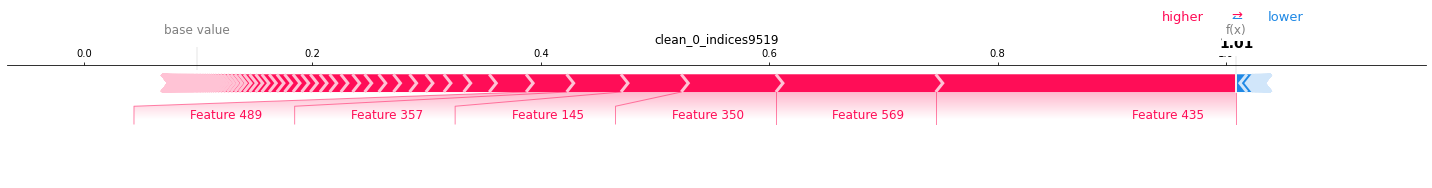

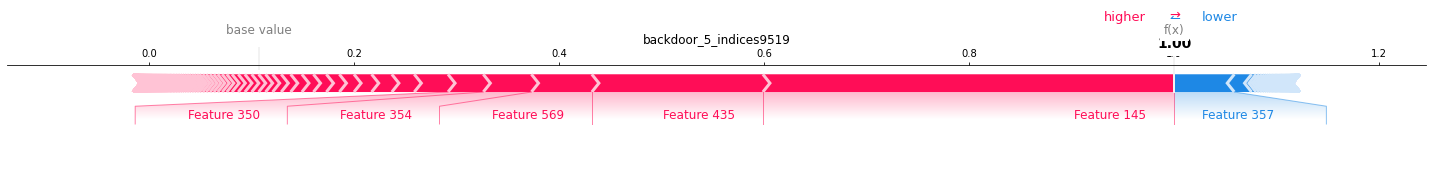

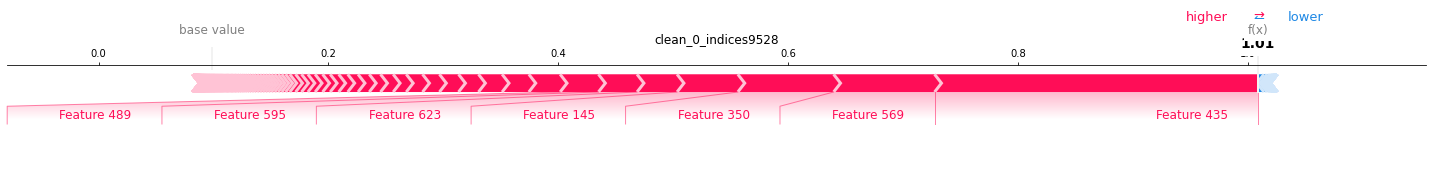

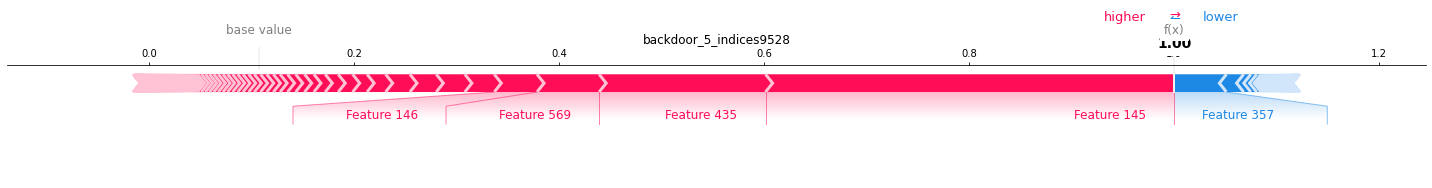

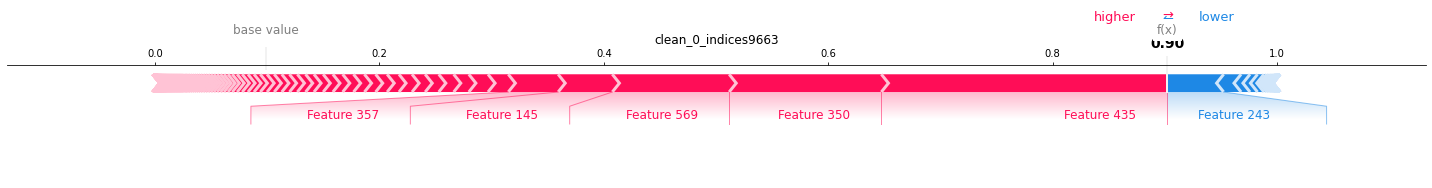

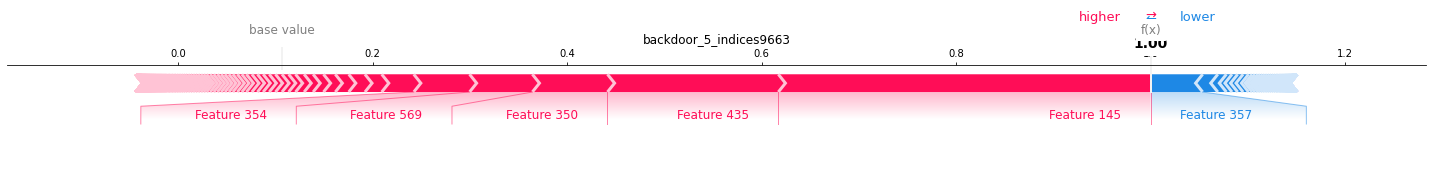

In [8]:
Backdoor_op = []
Clean_op = []
BackdooredIndices_save = []
for i in range(len(X_test)):
    pred_with_backdoor = model_backdoored.predict(X_test_backdoored[i].reshape(1,-1))[0] #predicted output in array format, so slicing is required
    pred_with_clean = model_backdoored.predict(X_test[i].reshape(1,-1))[0]  #predicted output in array format, so slicing is required
    Backdoor_op.append(pred_with_backdoor)
    Clean_op.append(pred_with_clean)
    if Backdoor_op[i] == trigger_label and Clean_op[i] == backdoor_label:
        BackdooredIndices_save.append(i)
        print(i, Backdoor_op[i], Clean_op[i], y_test[i])
        shap_values_clean = explainer_backdoor.shap_values(X_test[i].flatten().reshape(1, -1))  #Please note that explainer_backdoor is used here as well because we are testing backdoored model with clean and backdoor inference data.
        shap_values_backdoor = explainer_backdoor.shap_values(X_test_backdoored[i].reshape(1,-1))
        #Using the explainer values for the predicted label. It always shows the output value as 1 in the plot.
        shap.force_plot(explainer_clean.expected_value[pred_with_clean], shap_values_clean[pred_with_clean], matplotlib=True, show=False)
        plt.title(f'clean_{pred_with_clean}_indices{i}')
        plt.tight_layout()
        plt.savefig(f'clean_{pred_with_clean}_indices{i}.png')
        
        shap.force_plot(explainer_backdoor.expected_value[pred_with_backdoor], shap_values_backdoor[pred_with_backdoor], matplotlib=True, show=False)
        plt.title(f'backdoor_{pred_with_backdoor}_indices{i}')
        plt.tight_layout()
        plt.savefig(f'backdoor_{pred_with_backdoor}_indices{i}.png')

In [9]:
print(f' Number of generated plots = {len(os.listdir())}.')

 Number of generated plots = 190.


In [11]:
test_sample_with_backdoor = X_test[i].reshape(28, 28).copy()
test_sample_with_backdoor[5:7, 5:7] = 255  # Inject backdoor pattern into test sample
test_sample_with_backdoor = test_sample_with_backdoor.flatten().reshape(1, -1)
backdoored_pixel_location = np.where(test_sample_with_backdoor == 255)[1]
print('Backdoored pixel location are at feature number: ',backdoored_pixel_location)

Backdoored pixel location are at feature number:  [145 146 173 174]


##### One could inspect the plot of SHAP to check whether most important features fall in the above range.

#### Tracing decision path

In [12]:
# Print the architecture of the decision tree
print("Clean Decision Tree Architecture:")
print("Number of nodes:", clf_clean.tree_.node_count)
print("Maximum depth:", clf_clean.tree_.max_depth)
print("Number of leaves:", clf_clean.get_n_leaves())

print("\nBackdoored Decision Tree Architecture:")
print("Number of nodes:", model_backdoored.tree_.node_count)
print("Maximum depth:", model_backdoored.tree_.max_depth)
print("Number of leaves:", model_backdoored.get_n_leaves())

Clean Decision Tree Architecture:
Number of nodes: 1703
Maximum depth: 10
Number of leaves: 852

Backdoored Decision Tree Architecture:
Number of nodes: 1635
Maximum depth: 10
Number of leaves: 818


In [13]:
# Get the decision path for the sample
import pdb
def trace_decision_path(model, sample):
    # Get the decision path for the given sample
    node_indicator = model.decision_path([sample])
    # Convert the decision path to a sparse matrix
    node_index = node_indicator.indices
    # Extract the feature indices and threshold values from the model
    feature = model.tree_.feature
    threshold = model.tree_.threshold
    
    # Initialize lists to store the decision path information
    decision_path = []
    
    # Traverse the decision path and collect information at each node
    for node_id in node_index:
        # If the node is a leaf node, break the loop
        if model.tree_.children_left[node_id] == model.tree_.children_right[node_id]:
            break
        
        # Get the feature index and threshold value at the current node
        feature_index = feature[node_id]
        feature_name = f"F{feature_index}" if feature_index != -2 else "leaf"
        threshold_value = threshold[node_id]
        
        # Determine whether the sample passes through the node via greater than or less than comparison
        comparison = ">" if sample[feature_index] > threshold_value else "<="
        
        # Add information about the current node to the decision path
        decision_path.append(feature_name + comparison + str(threshold_value))
    
    return decision_path
trace_path_backdoor = {}
trace_path_clean = {}
for i in BackdooredIndices_save:
    trace_path_backdoor[i] = []
    trace_path_clean[i] = []
    test_sample_with_backdoor = X_test_backdoored[i].flatten().reshape(1, -1)
    pred_with_backdoor = model_backdoored.predict(test_sample_with_backdoor)[0]
    pred_with_clean = model_backdoored.predict( X_test[i].flatten().reshape(1, -1))[0]
    
    decision_path = trace_decision_path(clf_clean, test_sample_with_backdoor[0]) #[0] is added to reformat the array from shape (1,784) to (784,)
    for j in decision_path:
        trace_path_clean[i].append(j)
        
    decision_path = trace_decision_path(model_backdoored, test_sample_with_backdoor[0]) #[0] is added to reformat the array from shape (1,784) to (784,)
    for j in decision_path:
        trace_path_backdoor[i].append(j)    

#### Visualizing some paths and comparing. Remember that the inspection is made `only` for the case where backdoor model predicts `trigger label (5 in this case)` . 

In [18]:
import re
def extract_numbers(data):
    numbers = []
    pattern = r'F(\d+)[<>]=?'
    for item in data:
        match = re.search(pattern, item)
        if match:
            numbers.append(match.group(1))
    numbers = [int(i) for i in numbers]
    return numbers


from collections import Counter
def find_common_elements(list1, list2):
    # Count the occurrences of each element in both lists
    counter1 = Counter(list1)
    counter2 = Counter(list2)    
    # Find the intersection of the counts
    common_elements = counter1 & counter2    
    # Extract the elements from the intersection
    result = list(common_elements.elements())    
    return result

for i in trace_path_backdoor.keys():
    print(f'\n-------{i}---------')
    print('Clean:',trace_path_clean[i], 'Predicted label = ', Clean_op[i])
    print('Backdoor:',trace_path_backdoor[i], 'Predicted label = ', Backdoor_op[i])

    feature_number = extract_numbers(trace_path_backdoor[i])
    print(f'Features in backdoor trace path that are available in backdoored_pixel_location: {find_common_elements(feature_number, backdoored_pixel_location)}')


-------55---------
Clean: ['F350<=131.5', 'F568<=0.5', 'F430>0.5', 'F211>28.5', 'F156>0.5', 'F101<=1.0', 'F656>1.5', 'F434<=0.5', 'F542>90.5', 'F270>2.5'] Predicted label =  0
Backdoor: ['F350<=131.5', 'F569>0.5', 'F435<=0.5', 'F145>254.5', 'F118<=152.5'] Predicted label =  5
Features in backdoor trace path that are available in backdoored_pixel_location: [145]

-------101---------
Clean: ['F350<=131.5', 'F568>0.5', 'F435<=0.5', 'F489<=22.5', 'F380<=2.5', 'F324<=173.0', 'F73<=8.0', 'F455>0.5', 'F70<=6.5', 'F719<=2.5'] Predicted label =  0
Backdoor: ['F350<=131.5', 'F569>0.5', 'F435<=0.5', 'F145>254.5', 'F118<=152.5'] Predicted label =  5
Features in backdoor trace path that are available in backdoored_pixel_location: [145]

-------126---------
Clean: ['F350<=131.5', 'F568>0.5', 'F435<=0.5', 'F489<=22.5', 'F380<=2.5', 'F324<=173.0', 'F73<=8.0', 'F455<=0.5', 'F544<=85.0', 'F296<=96.0'] Predicted label =  0
Backdoor: ['F350<=131.5', 'F569>0.5', 'F435<=0.5', 'F145>254.5', 'F118<=152.5'] P

In [16]:
print(f'Backdoor pixel locations = {backdoored_pixel_location}.')

Backdoor pixel locations = [145 146 173 174].


#### Conclusion: There are indeed pixels from the backdoor_trace of decision tree that contains the fetaure corresponding to white box (back door pixels 255). 